<h1 style='font-size: 35px; color: crimson; font-family: Candara; font-weight: 600'>Exploratory Data Analysis (EDA) on the Iris Dataset</h1>

 **Overview**  

This analysis focuses on performing *Exploratory Data Analysis (EDA)* on the **Iris Dataset**, a well-known dataset in machine learning and statistics. The goal is to understand the dataset’s structure, identify patterns, detect outliers, and explore feature relationships. The insights from this analysis can be used for further research, classification modeling, and improving data-driven decision-making.

---

📌 **Goals of the Analysis**  

Through this EDA, we aim to:  
✅ Understand the **basic structure** of the Iris dataset.  
✅ Identify **key features** that differentiate species.  
✅ Provide **visualizations** to summarize data insights.  
✅ Compute summary statistics, specifically, **Mean**(Average value of each numerical parameter within groups).

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import Required Libraries</h3>

In [306]:
from sklearn.datasets import load_iris

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols as smf_ols
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import statsmodels.api as sm
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import math

print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import and Preprocessing Dataset</h3>

In [307]:
iris = load_iris()  # Load the Iris dataset
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species of iris)

# You can also access the feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("Shape of data:", X.shape)
print("Shape of target:", y.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)
Shape of target: (150,)


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.1: Renaming Columns</h4>

In [308]:
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({i: name for i, name in enumerate(target_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.2: Dataset Informations/ Overview</h4>

In [309]:
df.shape

(150, 5)

In [310]:
df.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [312]:
for col in df.columns:
    Dtypes = df[col].dtypes
    print(f'{col}:', '.' * (80 - len(col) - len(str(Dtypes)) - 2), Dtypes)

sepal length (cm): ...................................................... float64
sepal width (cm): ....................................................... float64
petal length (cm): ...................................................... float64
petal width (cm): ....................................................... float64
species: ................................................................. object


In [313]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

<h4 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>1.3: Handling Duplicates Values</h4>

In [314]:
df.duplicated().sum()

1

<h4 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>1.4: Handling Missing Values</h4>

In [315]:
for col in df.columns:
    null_count = df[col].isna().sum()
    print(f'{col}:', '.' * (80 - len(col) - len(str(null_count)) - 2), null_count)

sepal length (cm): ............................................................ 0
sepal width (cm): ............................................................. 0
petal length (cm): ............................................................ 0
petal width (cm): ............................................................. 0
species: ...................................................................... 0


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.5: Handling Outliers Using IQR</h4>

In [316]:
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    return outlier_counts

numerical_columns = df.select_dtypes(include=['number'])
outlier_counts = remove_outliers_iqr(df, numerical_columns)

total_length = 100 
print(f"\n {' ' * 35}Outliers Detected (Count):")
for col, count in outlier_counts.items():
    Text_length = len(col)
    remaining_length = total_length - Text_length - len(str(count)) - 3
    print(f"{col} : {'.' * remaining_length}{count}")


                                    Outliers Detected (Count):
sepal length (cm) : ...............................................................................0
sepal width (cm) : ................................................................................4
petal length (cm) : ...............................................................................0
petal width (cm) : ................................................................................0


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.6: Renaming Columns</h4>

In [317]:
import re

def rename(ColumnName):
    Col = re.sub(r'\(', 'Paranthesis1', ColumnName) 
    Col = re.sub(r'\)', 'Paranthesis2', Col)
    Col = re.sub(r'\%', 'Percentage', Col)
    #Col = re.sub(r'\°', 'Centigrade', Col)
    
    
    RenamedColumns = re.sub(r' ', '_', Col)
    return RenamedColumns

def restore_name(RenamedColumns):
    Col = re.sub(r'_', ' ', RenamedColumns)
    Col = re.sub(r'Paranthesis2', ')', Col)
    Col = re.sub(r'Paranthesis1', '(', Col)
    Col =  re.sub('Percentage', '%', Col)
    #Col = re.sub(r'\Centigrade', '°', Col)
    
    return Col


def rename_column_content(value):
    value = re.sub(r'Paranthesis1', '(', value)
    value = re.sub(r'Paranthesis2', ')', value)
    value = value.replace('_', ' ')
    value = value.replace('Percentage', ' %')
    return value

# Apply the renaming function to the first column
#df['Column'] = df['Column'].apply(rename_column_content)

# Test the functions
renamed = rename(ColumnName='Plant Height (cm)')
restored = restore_name(renamed)

print(f"Renamed: {renamed}")
print(f"Restored: {restored}")

Renamed: Plant_Height_Paranthesis1cmParanthesis2
Restored: Plant Height (cm)


<h2 style='font-size: 35px; color: Tomato; font-family: Candara; font-weight: 600'>📌 Statistic Description of The Dataset</h2>

<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.1: Overall Statistic Description of The Datasets</h4>

In [318]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal width (cm),150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal length (cm),150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal width (cm),150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.2: Numerical  Variables Statistics Distributions </h4>

In [319]:
from scipy.stats import skew, kurtosis
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

       
        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

result = compute_overall_distribution_stats(df)
result

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,sepal length (cm),5.843,5.800,5.000,0.828,0.686,3.600,0.312,-0.574
1,sepal width (cm),3.057,3.000,3.000,0.436,0.190,2.400,0.316,0.181
2,petal length (cm),3.758,4.350,1.400,1.765,3.116,5.900,-0.272,-1.396
3,petal width (cm),1.199,1.300,0.200,0.762,0.581,2.400,-0.102,-1.336


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.3: Group-wise  Variables Statistics </h4>

In [320]:
def summary_stats(df, Metrics, group=None):
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df



Metrics = df.select_dtypes(include=np.number).columns.tolist()
Variables_stats_by_species = summary_stats(df, Metrics, group='species')
Variables_stats_by_species

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.01 ± 0.05,3.43 ± 0.05,1.46 ± 0.02,0.25 ± 0.01
1,versicolor,5.94 ± 0.07,2.77 ± 0.04,4.26 ± 0.07,1.33 ± 0.03
2,virginica,6.59 ± 0.09,2.97 ± 0.05,5.55 ± 0.08,2.03 ± 0.04
3,Grand Mean,5.843,3.057,3.758,1.199
4,SEM,0.068,0.036,0.144,0.062
5,%CV,14.171,14.256,46.974,63.555


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.4: Categorical  Variables Statistics Distributions </h4>

In [321]:
categories = ['species']
total_length = 100

for category in categories:
    print(f"\n{' ' * 35}Count occurrences of each {category}:")
    counts = df[category].value_counts()
    proportions = df[category].value_counts(normalize=True)
    for value, count in counts.items():
        proportion = proportions[value]
        text_length = len(f"{category}: {value}")
        remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
        print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")


                                   Count occurrences of each species:
species: setosa .......................................................................... 50 (33.33%)
species: versicolor ...................................................................... 50 (33.33%)
species: virginica ....................................................................... 50 (33.33%)


<h2 style='font-size: 35px; color: Tomato; font-family: Candara; font-weight: 600'>📌 Exploration of Data Distribution</h2>

<h3 style='font-size: 25px; color: Crimson; font-family: Candara; font-weight: 600'>3.1: Histogram (Frequency Distributions)</h3>

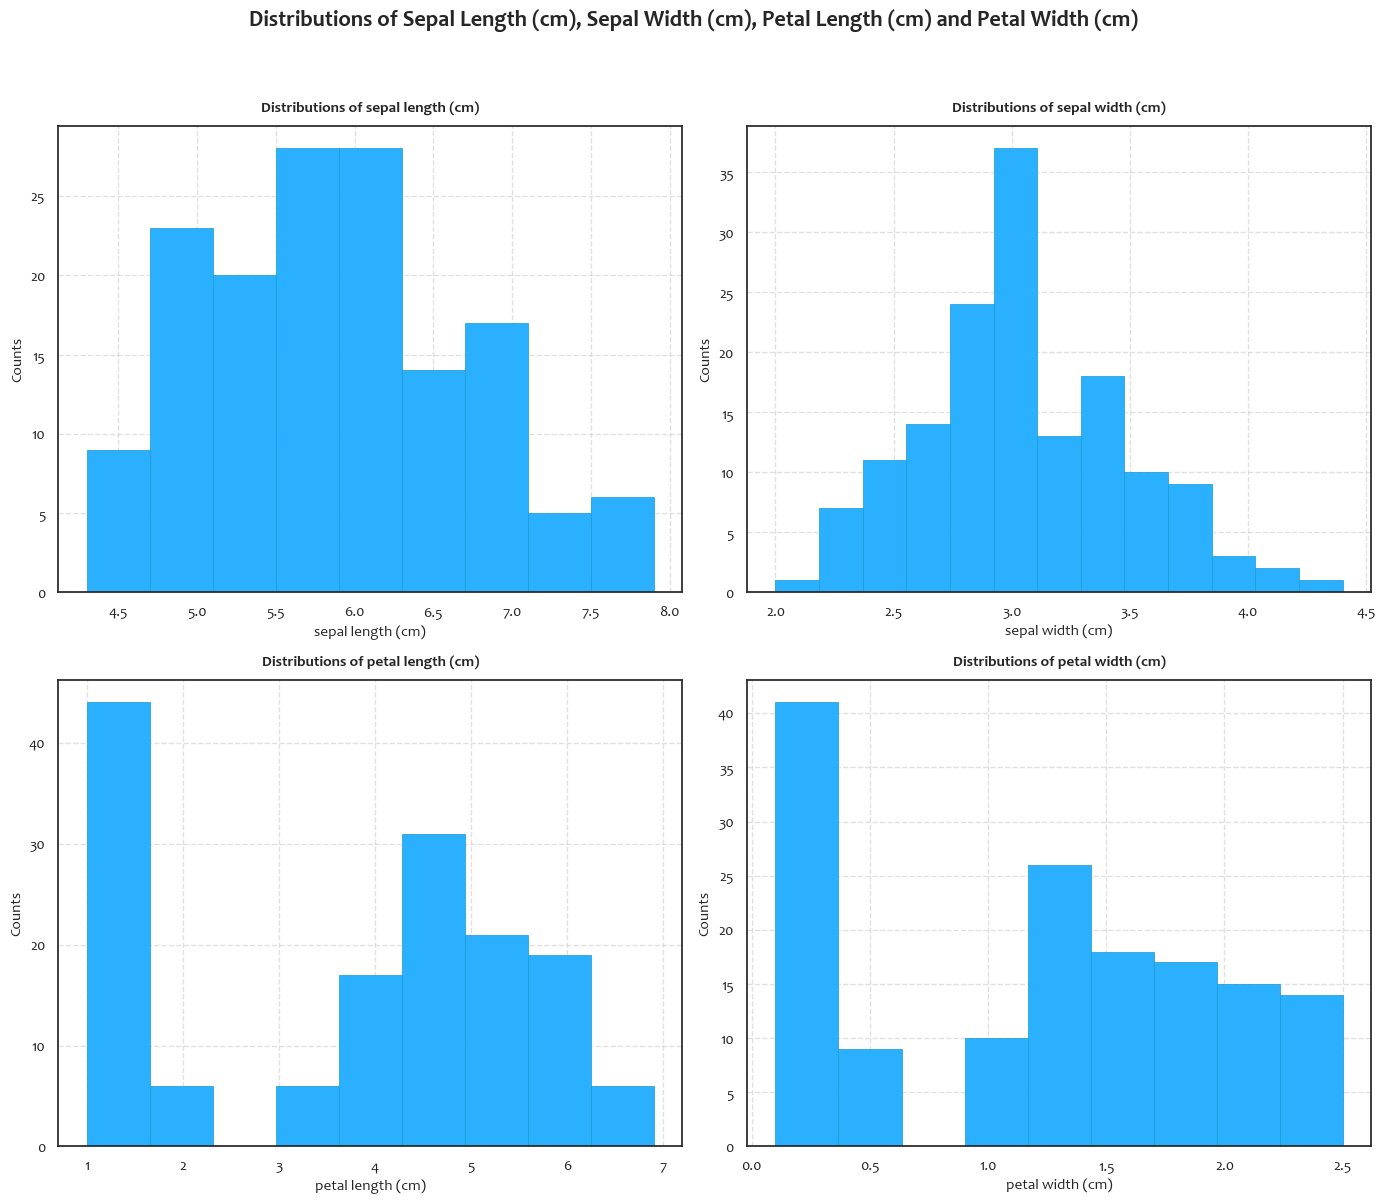

In [322]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)


fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.histplot(df[column], fill=True, ax=axes[idx], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Histogram.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.2: Barplot (Mean Comparisons)</h3>

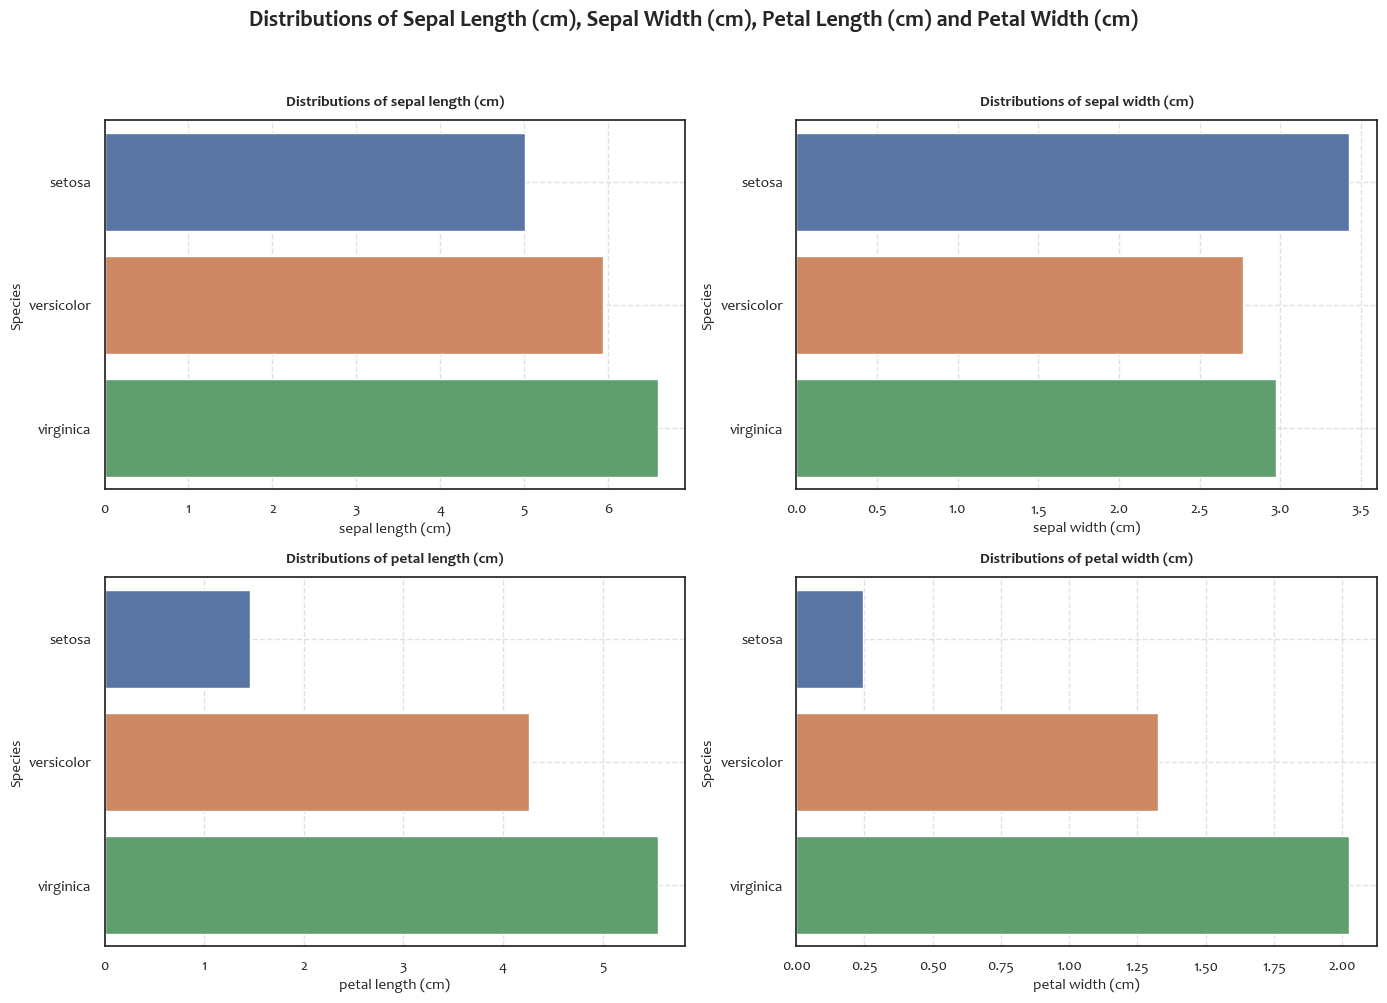

In [323]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.barplot(data=df, x=df[column],y=df['species'], fill=True, hue="species", ax=axes[idx],errorbar=None)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Species', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Barplot.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.3: Boxplot (Distributions Comparisons, and Outlier Detections)</h3>

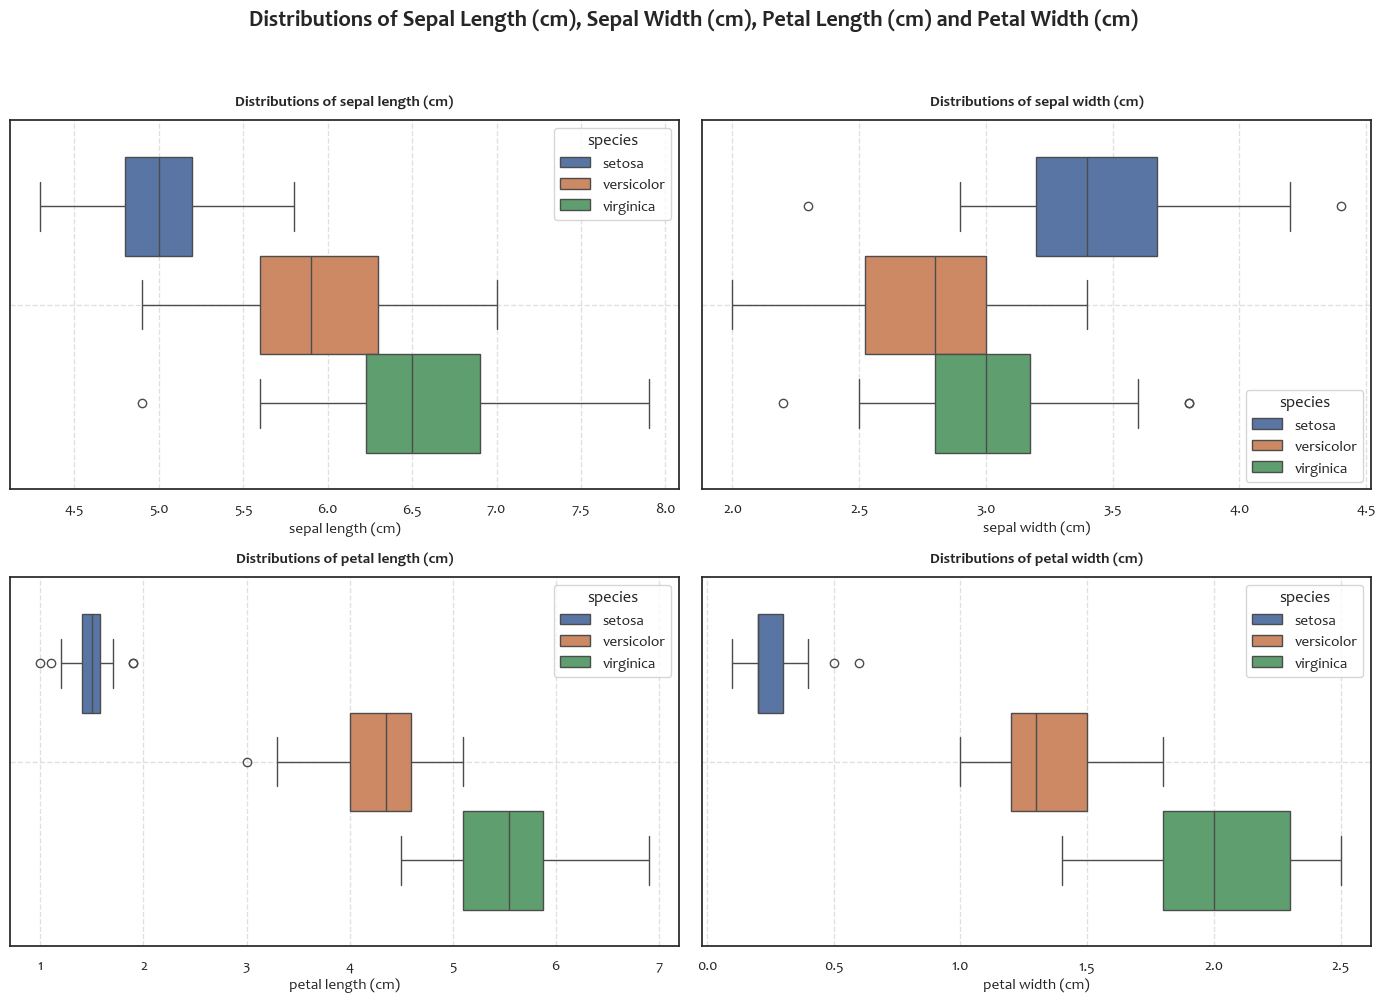

In [324]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.boxplot(data=df, x=df[column], hue="species", ax=axes[idx])   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Boxplot.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.4: Stripplots for Datapoints Explorations</h3>

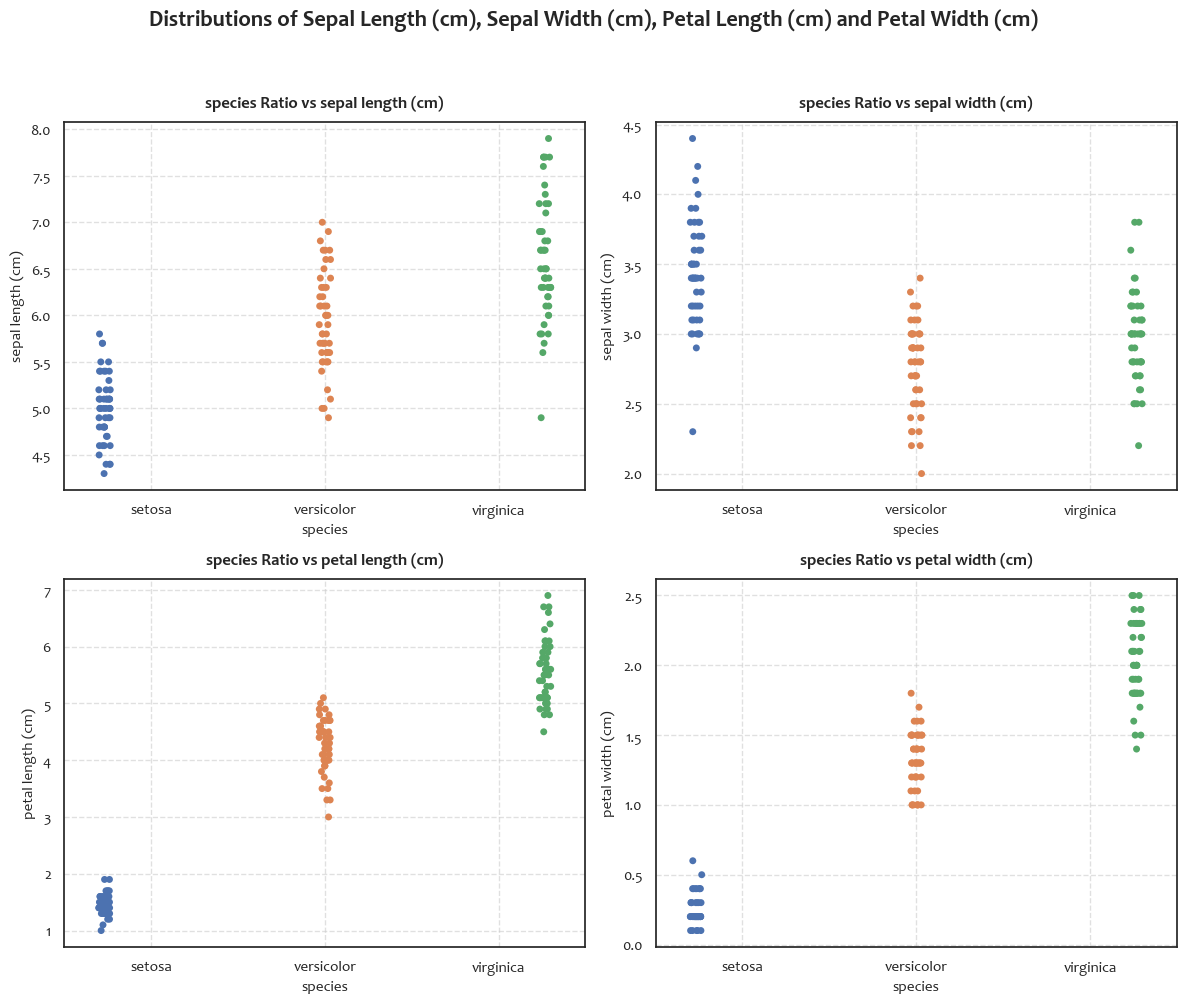

In [325]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)

axes = axes.flatten() if num_variables > 1 else [axes]
for idx, column in enumerate(Metrics):
    sns.stripplot(x='species', y=column, hue='species', data=df, ax=axes[idx], dodge=True)
    axes[idx].set_title(f"species Ratio vs {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].set_xlabel('species', fontsize=11)
    axes[idx].set_ylabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Sripplot.png")

plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.5: Kernel Density Estimation Plots (KDE)</h3>

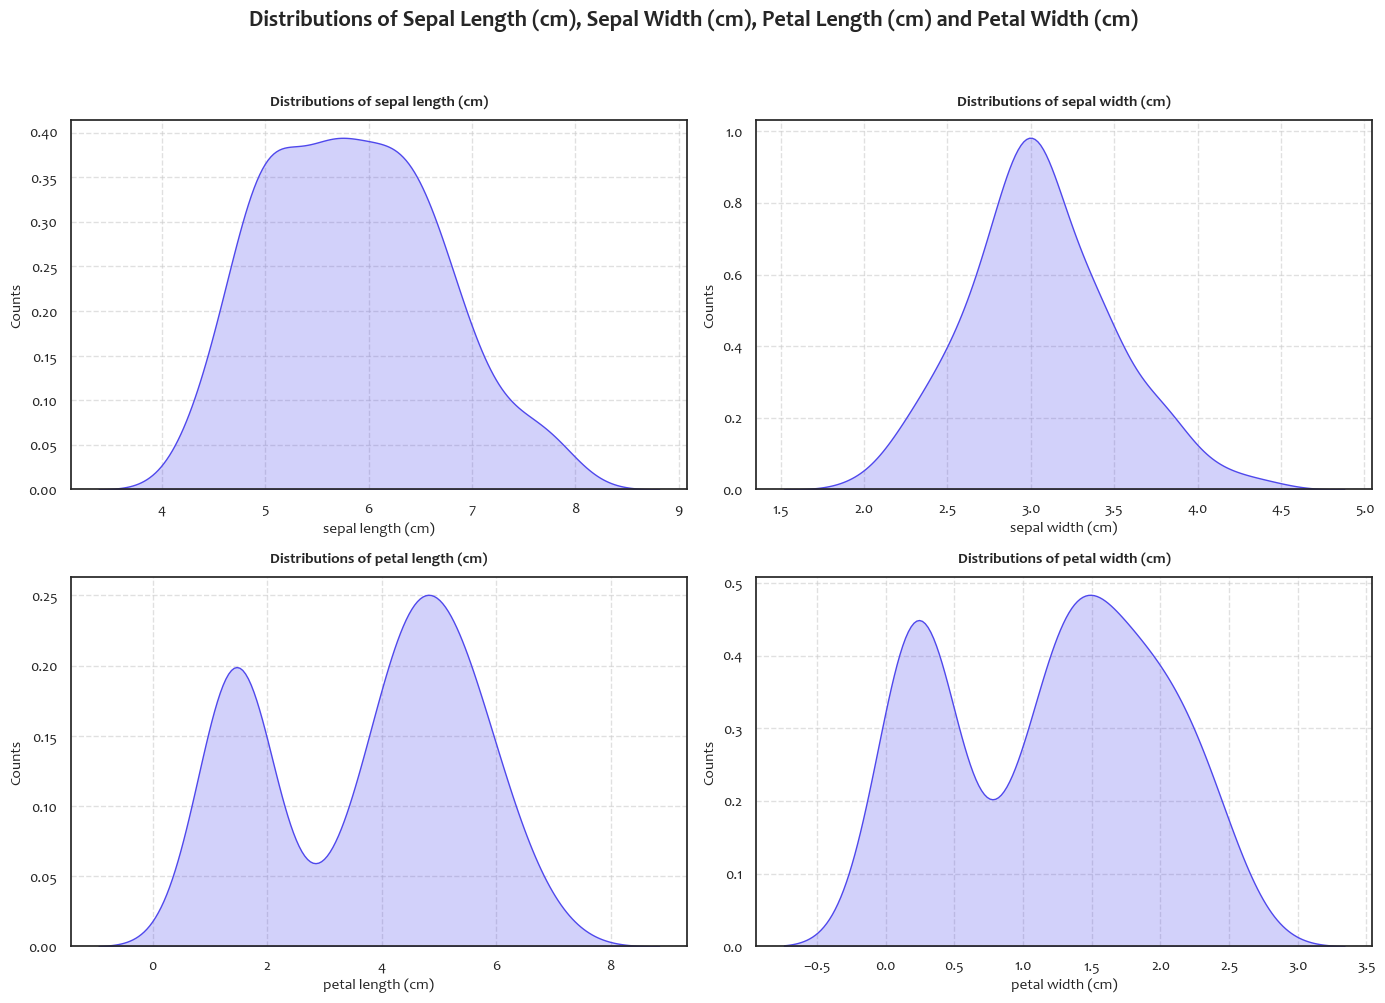

In [326]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.kdeplot(df[column], fill=True, ax=axes[idx], color="#4F48EC")   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Kernel Density Estimation Plots (KDE) 001.png")
plt.show()

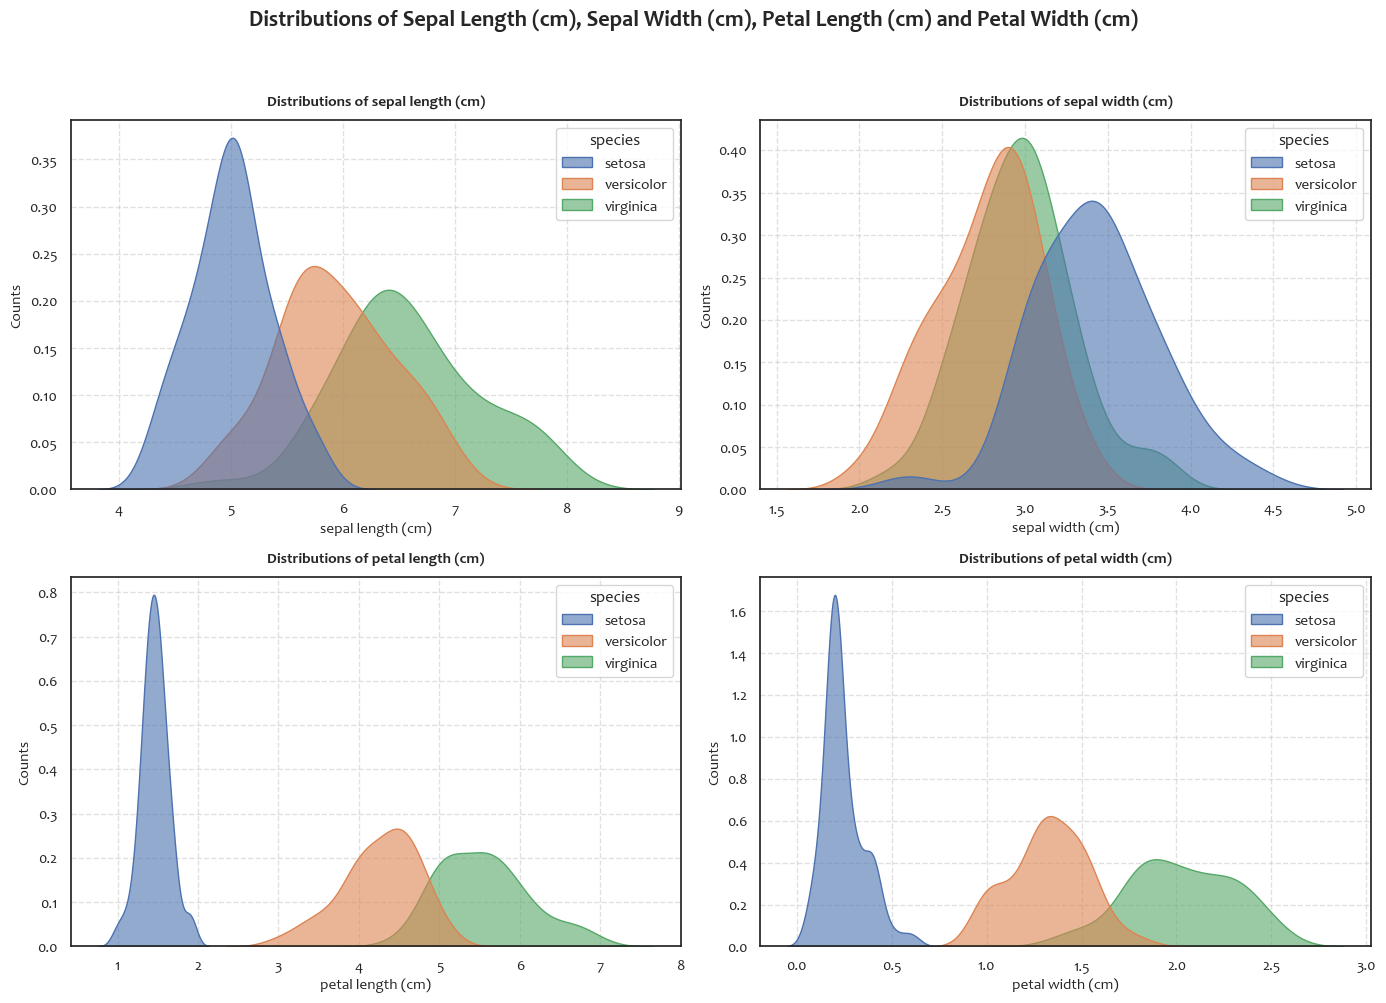

In [328]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.kdeplot(data=df, x=df[column], fill=True, hue="species", ax=axes[idx], alpha=0.6)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Kernel Density Estimation Plots (KDE) 002.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.6: Q-Q Plot</h3>

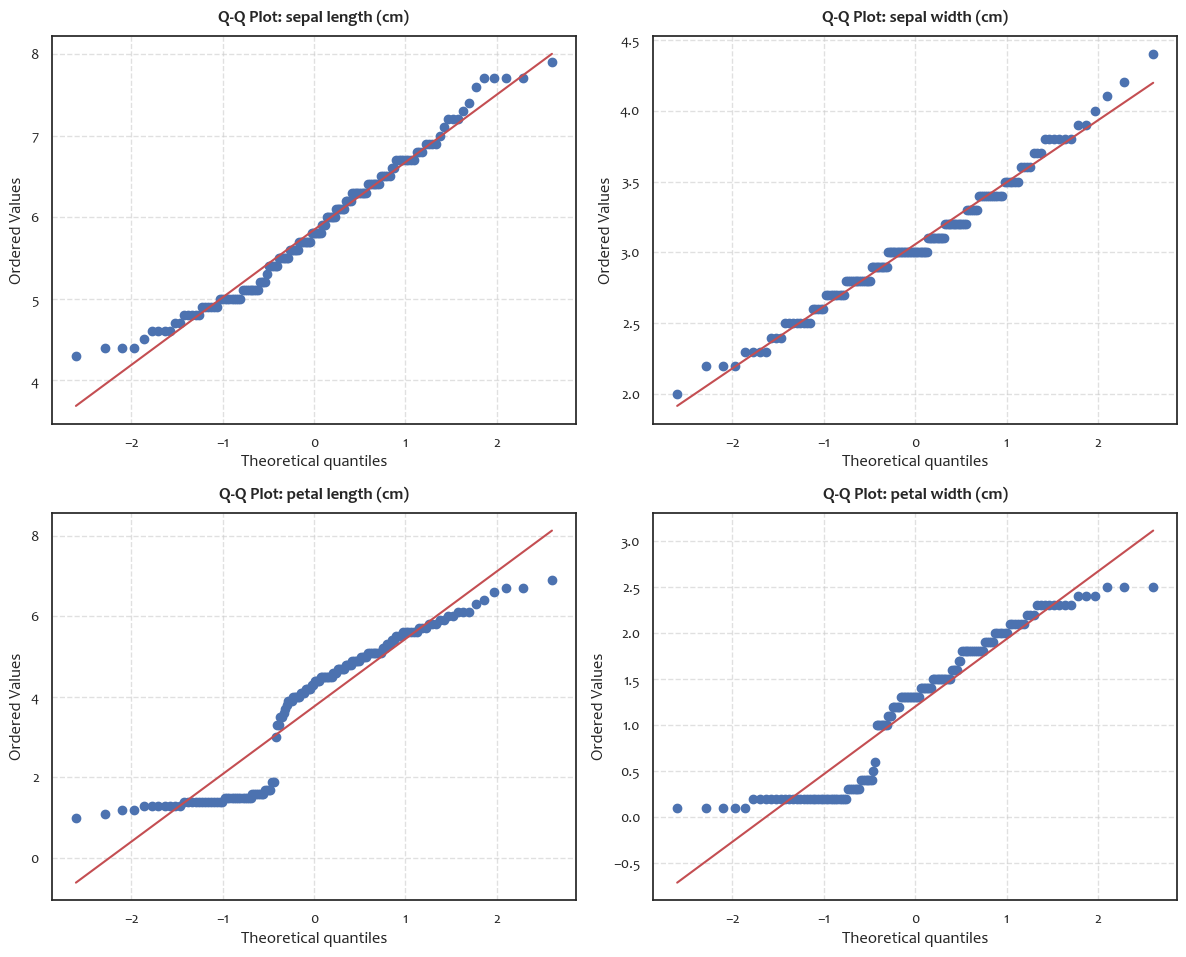

In [329]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    stats.probplot(df[column].dropna(), dist="norm", plot=axes[idx])
    axes[idx].set_title(f"Q-Q Plot: {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Q-Q Plot.png")
plt.show()

<h2 style='font-size: 35px; color: Green; font-family: Candara; font-weight: 600'>📌 Correllation Analysis (To explore Realationship Between Variables</h2>

<h3 style='font-size: 25px; color: orange; font-family: Candara; font-weight: 600'>4.1: Correlation Coefficients </h3>

In [330]:
dx = df.select_dtypes(include=[np.number])
correlation_matrix = dx.corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


<h3 style='font-size: 25px; color: orange; font-family: Candara; font-weight: 600'>4.2: Correlation Coefficients Heatmap </h3>

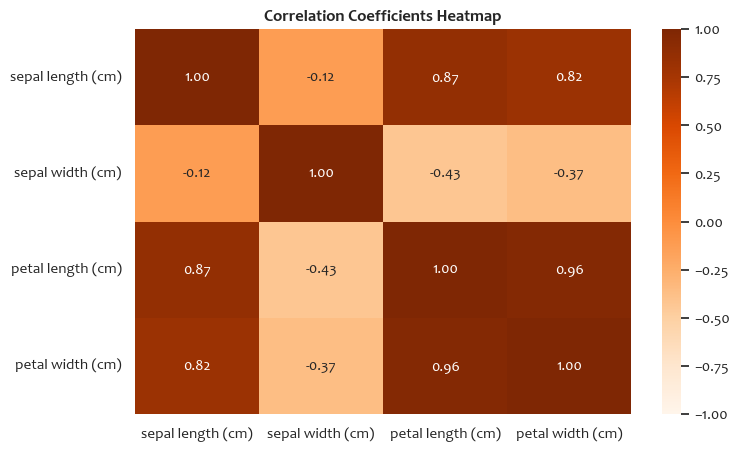

In [331]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Coefficients Heatmap', fontsize=12, fontweight='bold')
plt.savefig(f"Visualizations/Correlation Coefficients Heatmap.png")
plt.show()

<h3 style='font-size: 25px; color: orange; font-family: Candara; font-weight: 600'>4.3: Pearson’s</h3>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [332]:
from scipy.stats import pearsonr
def compute_pearson_r(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])

            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

# Compute and return the Pearson's r results as a DataFrame
pearson_results_df = compute_pearson_r(df)
pearson_results_df

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.118,0.152,Negative,Weak
1,sepal length (cm),petal length (cm),0.872,0.000,Positive,Strong
2,sepal length (cm),petal width (cm),0.818,0.000,Positive,Strong
3,sepal width (cm),petal length (cm),-0.428,0.000,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.366,0.000,Negative,Moderate
5,petal length (cm),petal width (cm),0.963,0.000,Positive,Strong


<h3 style='font-size: 25px; color: orange; font-family: Candara; font-weight: 600'>4.3: Relationship Between Variables (Scatterplot Matrix)</h3>

<Figure size 800x500 with 0 Axes>

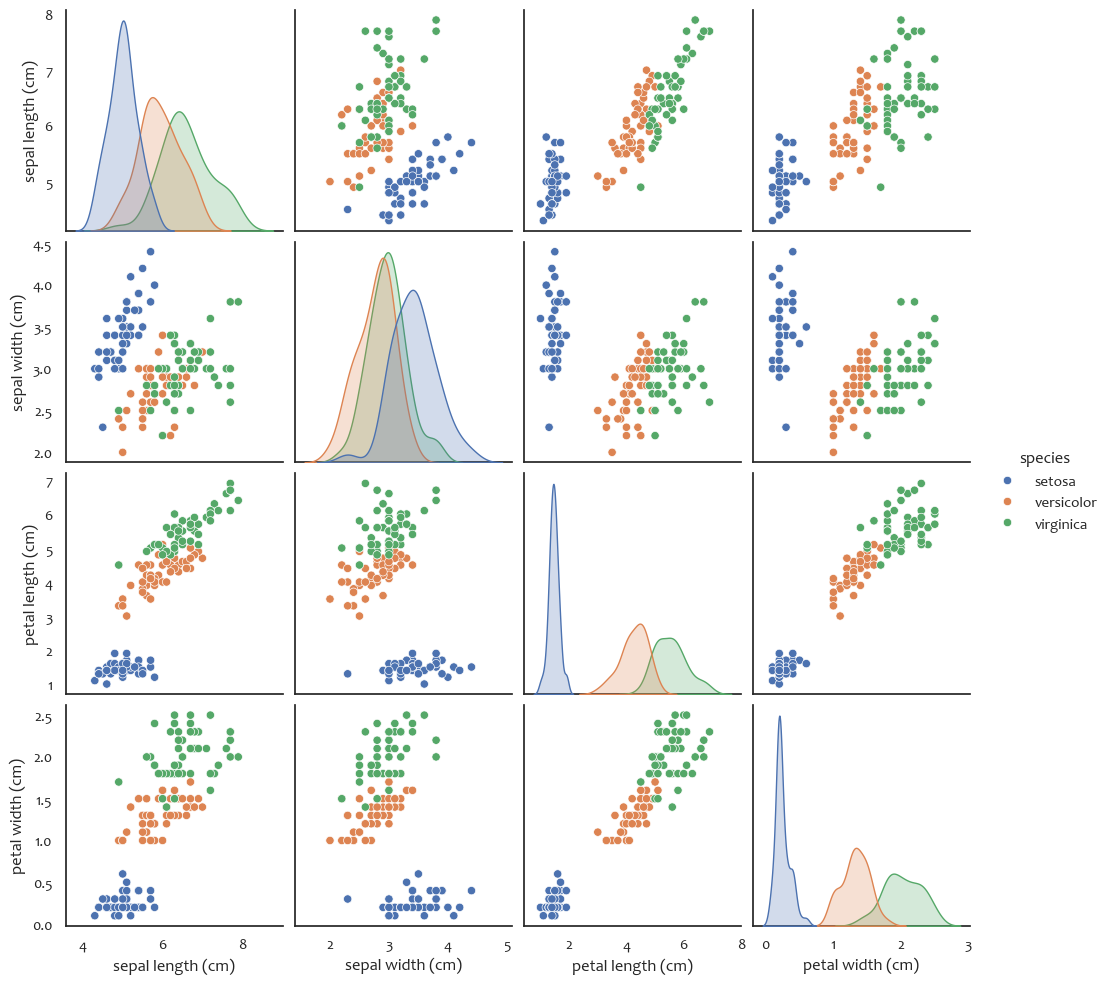

In [333]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
sns.pairplot(df, hue='species', diag_kind="kde")
plt.savefig(f"Visualizations/Pairplot Matrix).png")
plt.show()

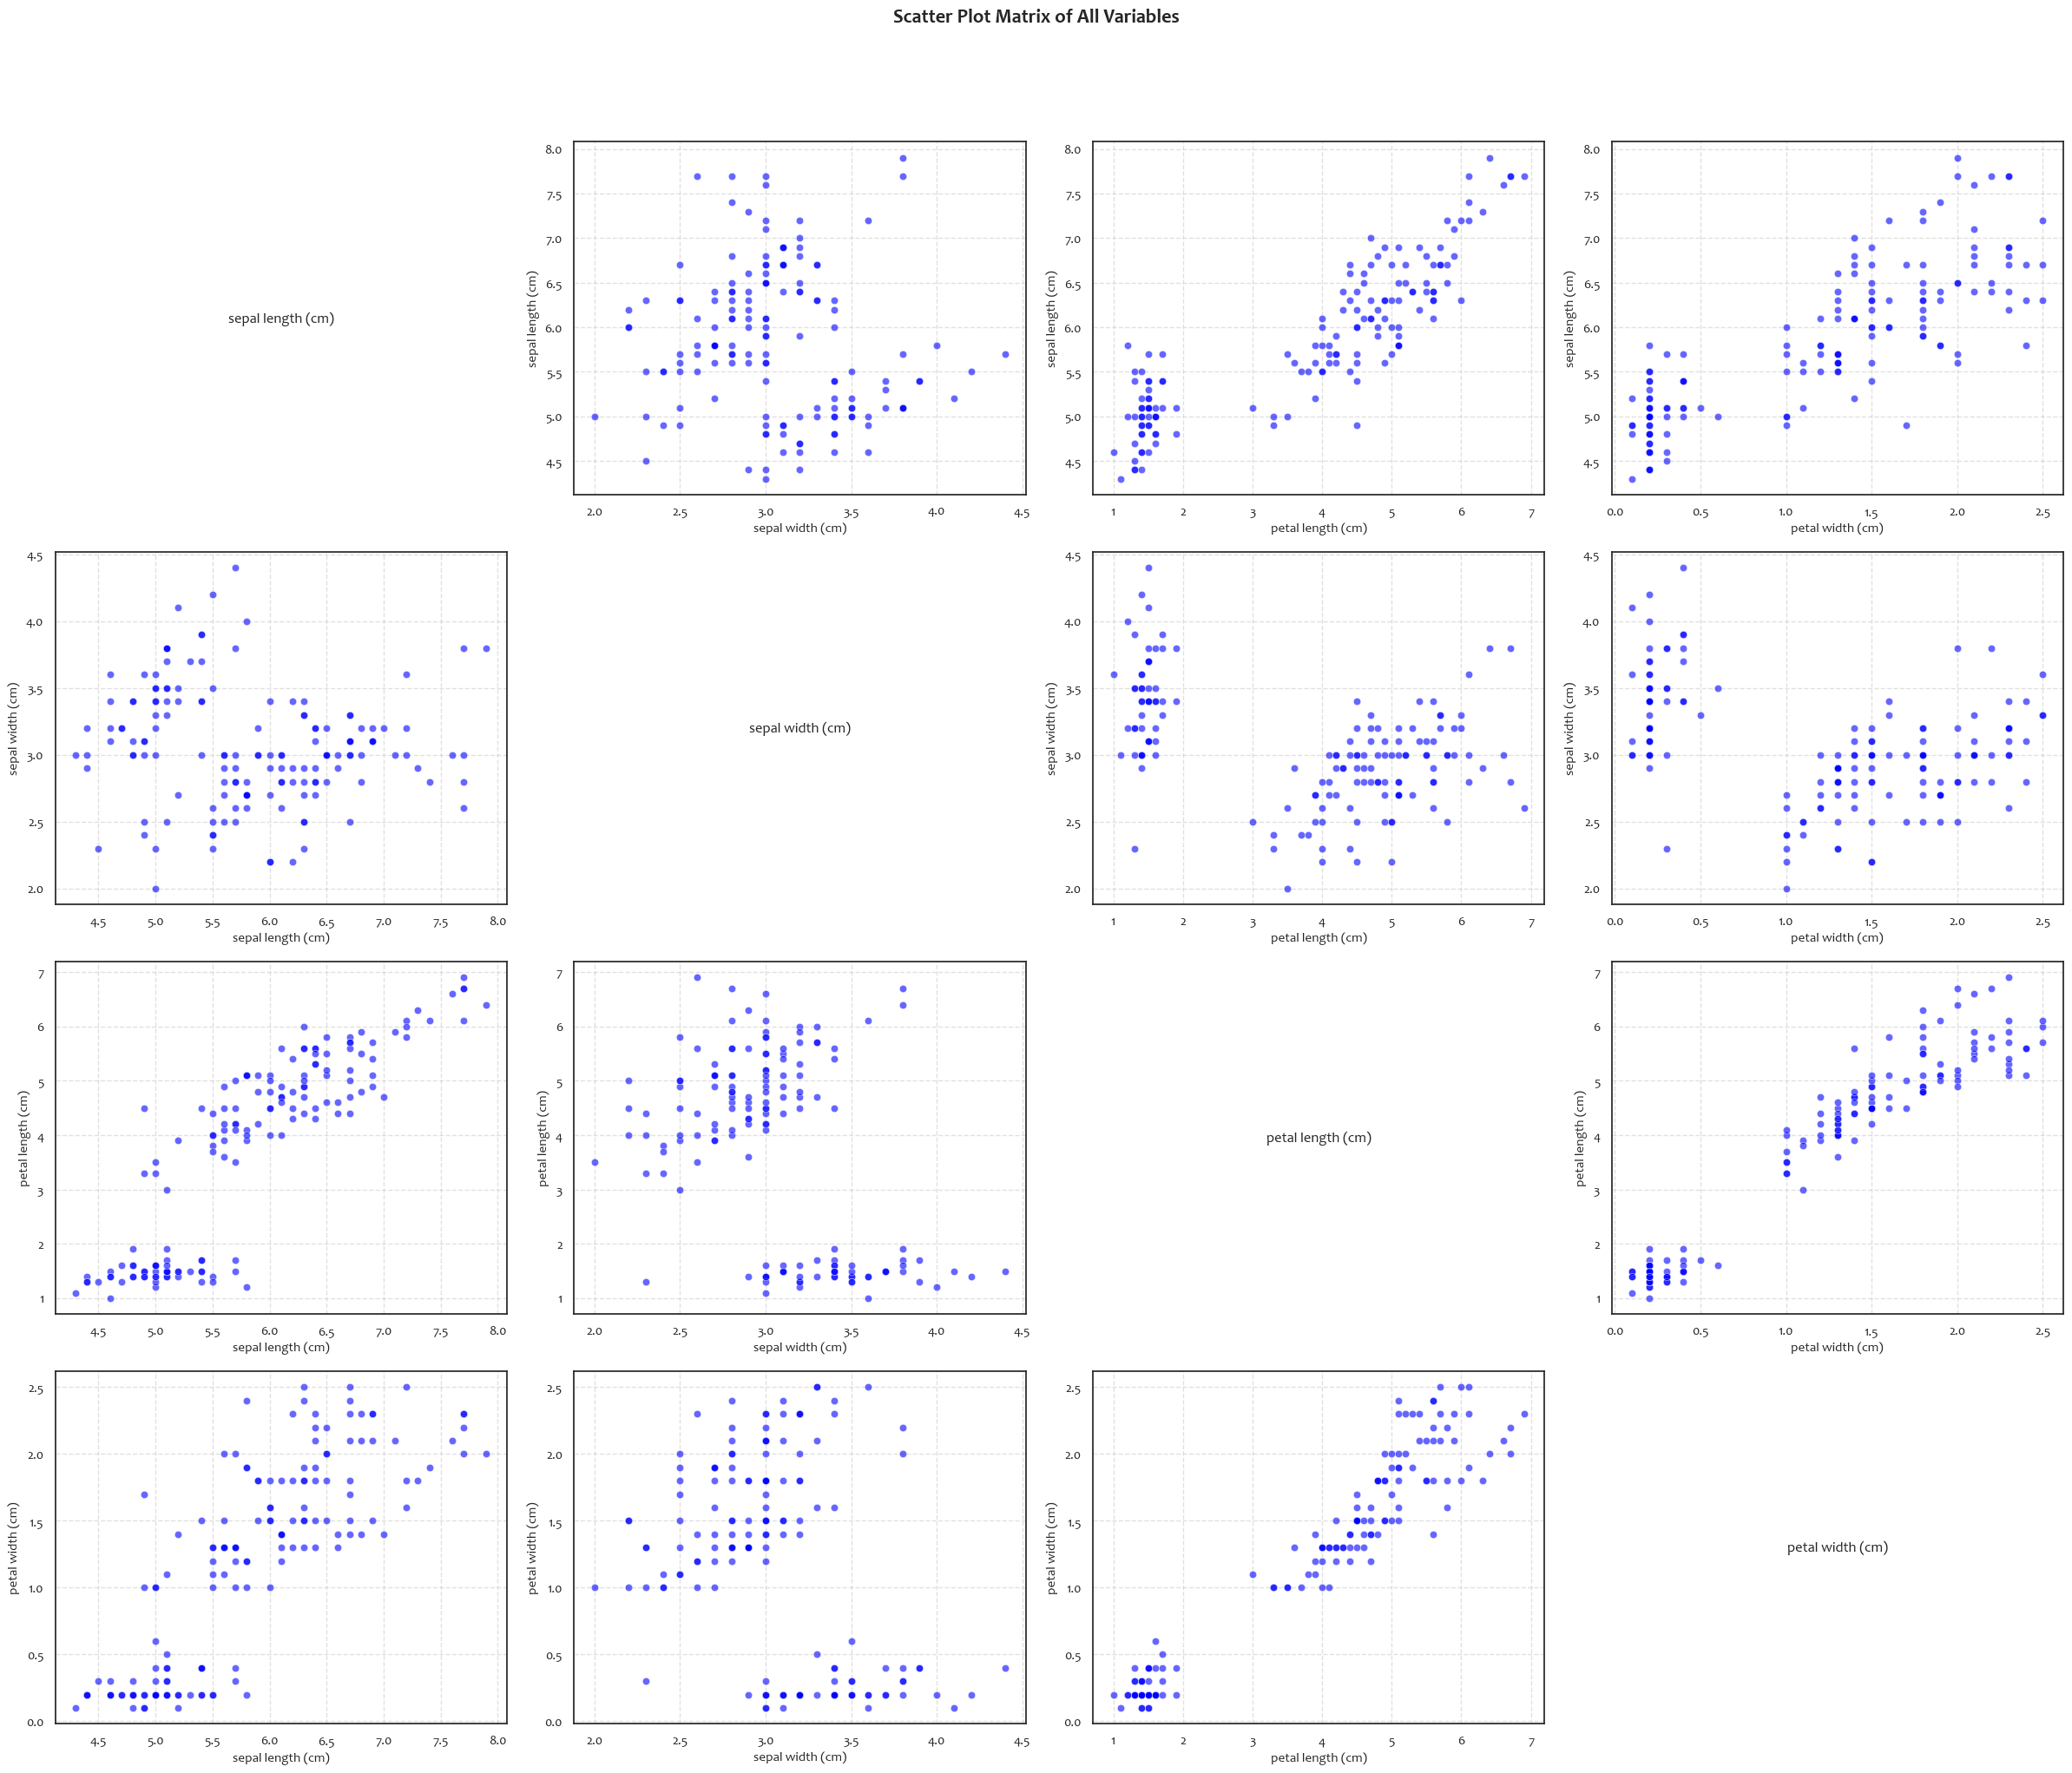

In [284]:
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

num_variables = len(Metrics)
rows = num_variables 
cols = num_variables

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle('Scatter Plot Matrix of All Variables', fontsize=16, fontweight='bold', y=1.02)

for i in range(num_variables):
    for j in range(num_variables):
        ax = axes[i, j]
        if i == j:
            # Diagonal: Leave it empty or add variable name
            ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Off-diagonal: Plot a scatter plot
            sns.scatterplot(x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, color='blue', alpha=0.6)
        ax.set_xlabel(Metrics[j], fontsize=11)
        ax.set_ylabel(Metrics[i], fontsize=11)
        ax.grid(linestyle='--', alpha=0.6)

for i in range(num_variables):
    for j in range(num_variables):
        if i == j:
            axes[i, j].axis('off')  # Hide the diagonal subplots

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Relationship Between Variables (Scatterplot Matrix).png")
plt.show()

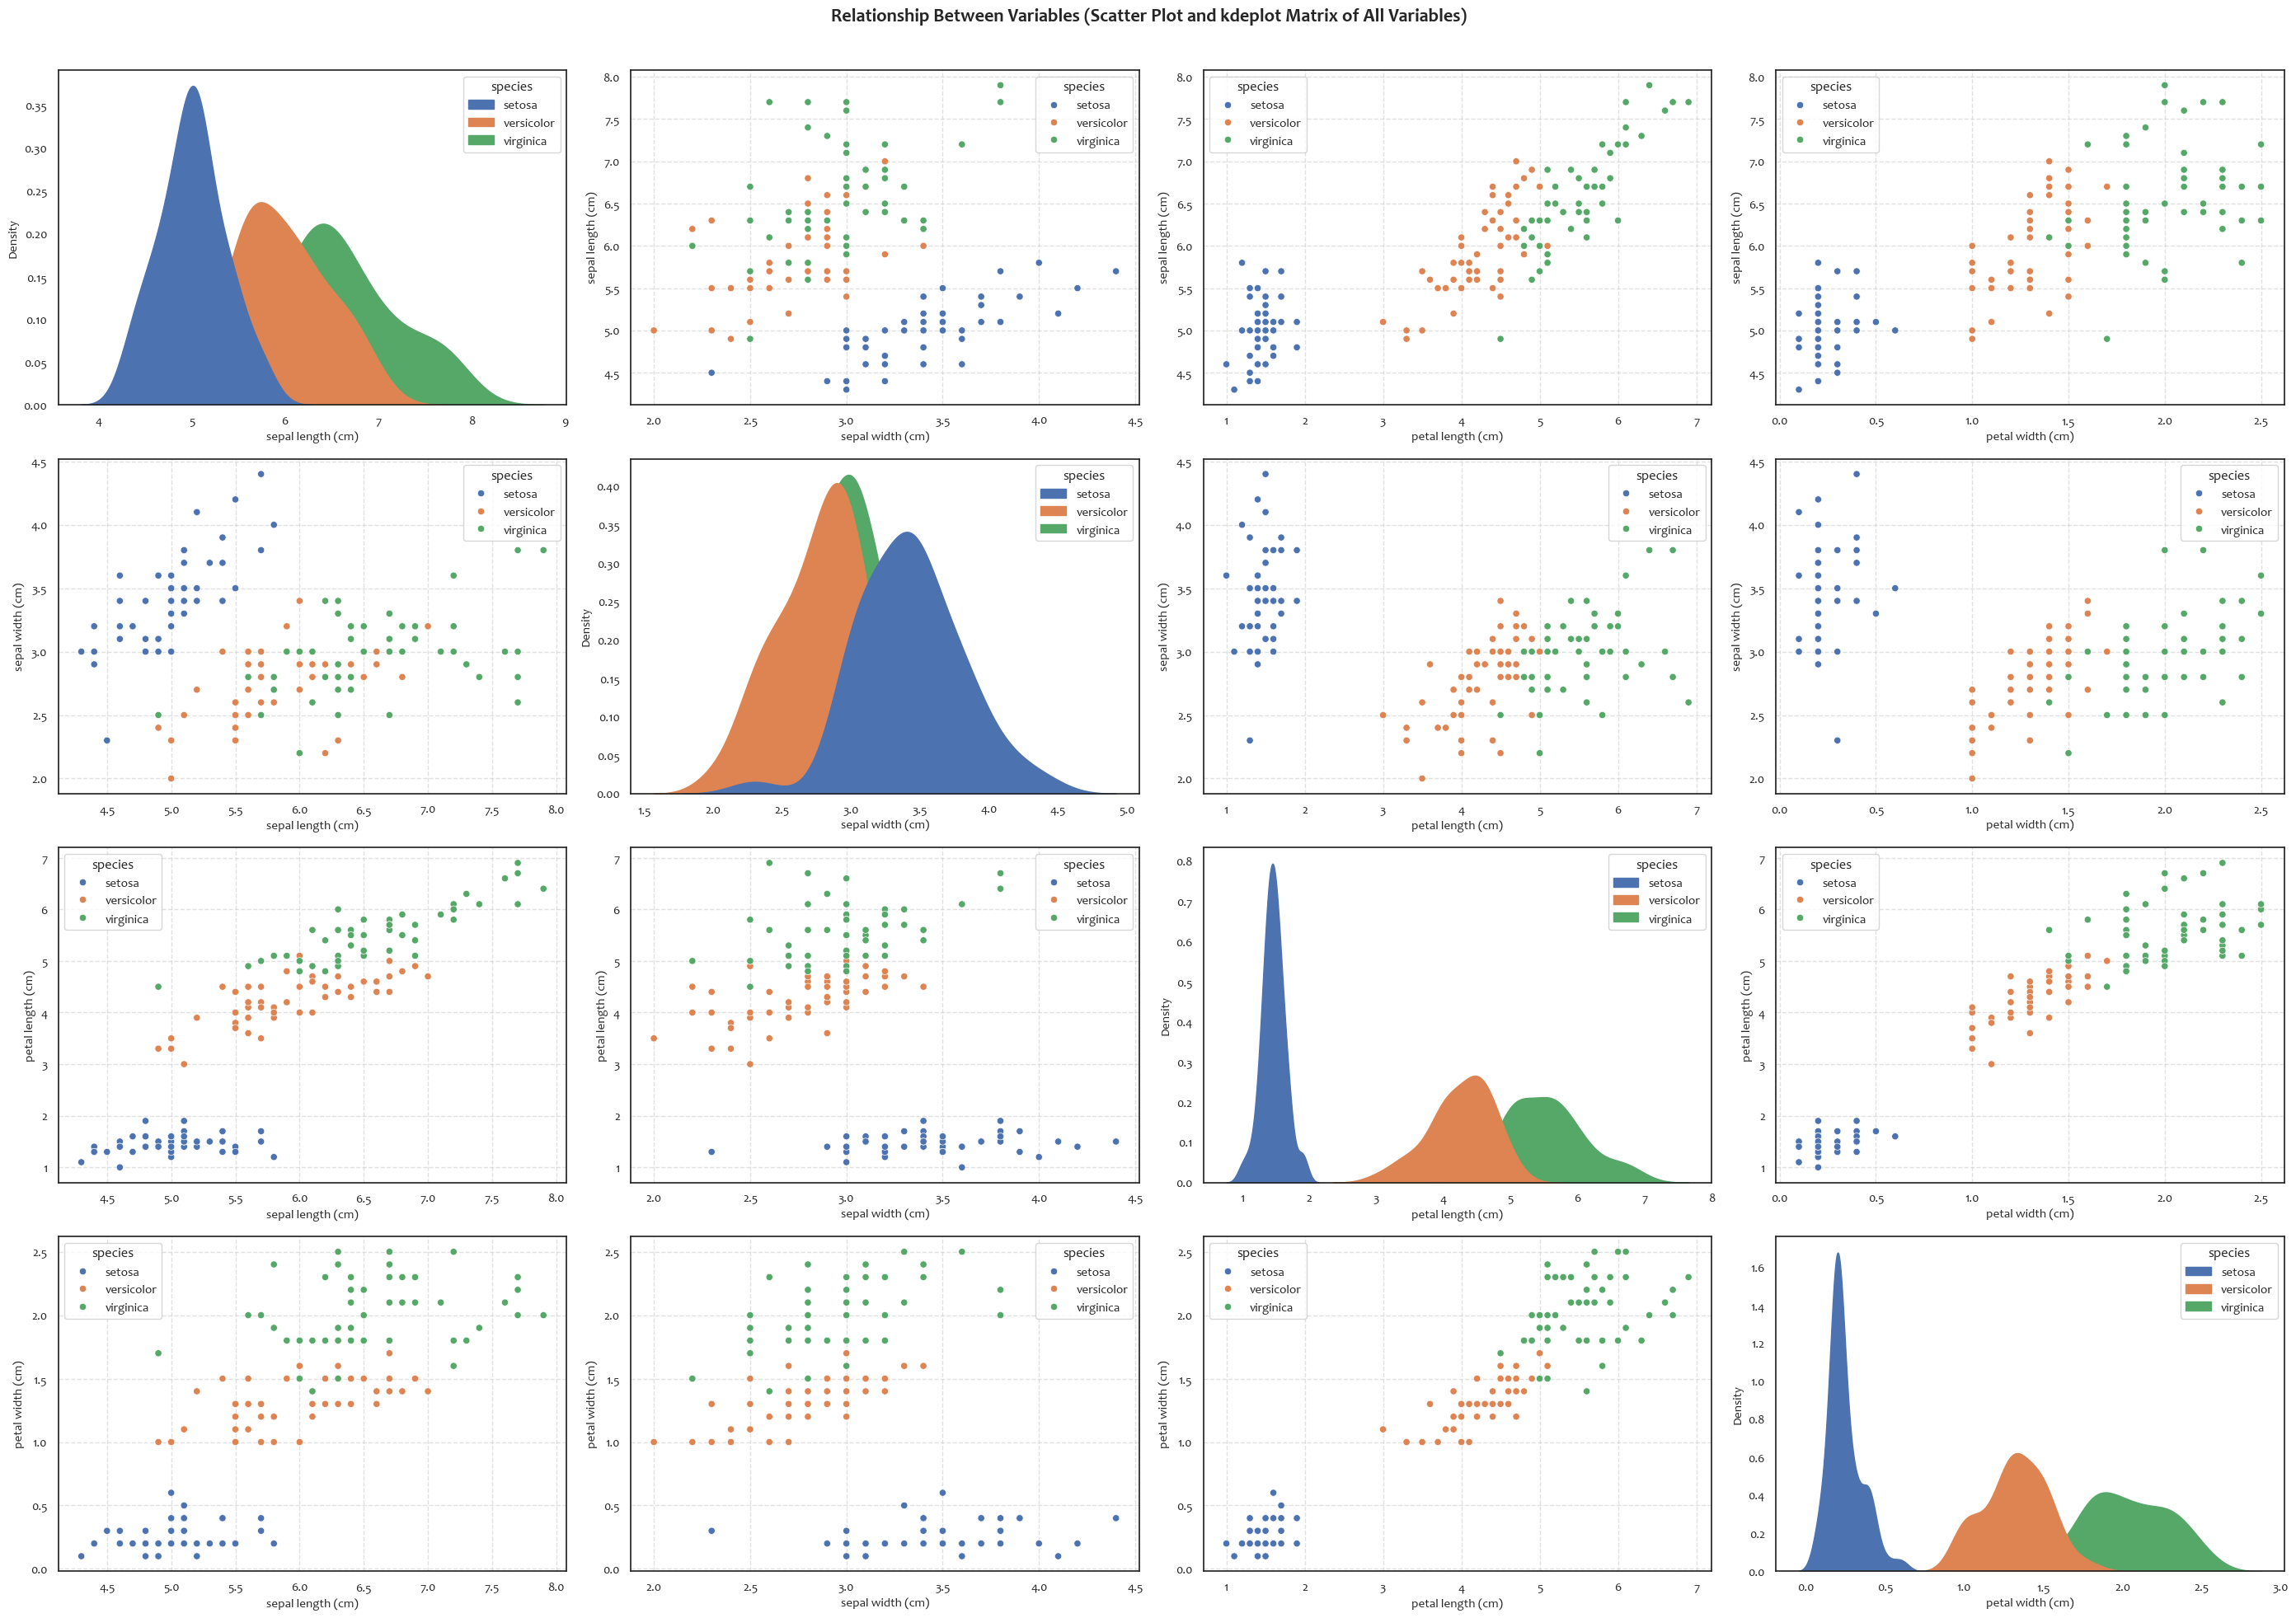

In [334]:
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

num_variables = len(Metrics)
rows = num_variables 
cols = num_variables

fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows))
fig.suptitle('Relationship Between Variables (Scatter Plot and kdeplot Matrix of All Variables)', fontsize=16, fontweight='bold')

for i in range(num_variables):
    for j in range(num_variables):
        ax = axes[i, j]
        if i == j:
            sns.kdeplot(data=df, x=df[Metrics[j]], ax=ax, fill=True, hue='species', alpha=1)
            # Diagonal: Leave it empty or add variable name
            #ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel('Density', fontsize=11)
        else:
            # Off-diagonal: Plot a scatter plot
            sns.scatterplot(data=df, x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, hue='species', alpha=1)
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel(Metrics[i], fontsize=11)
            ax.grid(linestyle='--', alpha=0.6)

for i in range(num_variables):
    for j in range(num_variables):
        if i == j:
            axes[i, j].axis('on')  # Hide the diagonal subplots

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Relationship Between Variables (Scatterplot Matrix).png")
plt.show()

<h1 style='font-size: 35px; color: crimson; font-family: Candara; font-weight: 600'>📌 Statistical Testing (Statistical Significance)</h1>

<h2 style='font-size: 30px; color: Tomato; font-family: Candara; font-weight: 600'>5.1: Parametric Tests</h2>

<h3 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>5.1.1: Parametric Tests Perquisites</h3>

<h3 style='font-size: 23px; color: Green; font-family: Candara; font-weight: 600'>5.1.1:1: Normal Distribution (Normality Test)</h3>

<h4 style='font-size: 20px; color: purple; font-family: Candara; font-weight: 600'>A. Normality Test</h4>

In statistical analysis, it's important to check if the data follows a normal distribution before proceeding with certain tests, like t-tests or ANOVA. The **Normality Test** helps us assess whether the dataset approximates a normal distribution, which is a key assumption for many parametric statistical tests.

<h4 style='font-size: 20px; color: orange; font-family: Candara; font-weight: 600'>🔘 Shapiro Wilk Test</h4>

In [335]:
from scipy.stats import shapiro
def ShapirowilkTest(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame.")
    
    results = []
    for col in numerical_cols:
        stat, p_value = shapiro(df[col])
        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    
    results_df = pd.DataFrame(results)
    
    results_styled = results_df.style.format({'Statistic': '{:.4f}', 'P-Value': '{:.3f}'})
    return results_df, results_styled

shapiro_results, shapiro_results_styled = ShapirowilkTest(df)
shapiro_results

,Variable,Statistic,P-Value,Normality
0,sepal length (cm),0.976,0.010,Not Normally Distributed
1,sepal width (cm),0.985,0.101,Normally Distributed
2,petal length (cm),0.876,0.000,Not Normally Distributed
3,petal width (cm),0.902,0.000,Not Normally Distributed


<h4 style='font-size: 20px; color: orange; font-family: Candara; font-weight: 600'>🔘 Central Limit Theorem (CLT)</h4>


The Central Limit Theorem (CLT) states that, regardless of the population distribution, the sampling distribution of the sample mean will tend to follow a normal distribution as the sample size increases, provided the samples are independent and identically distributed (i.i.d.). This theorem is fundamental in inferential statistics because it allows us to use normal probability models for hypothesis testing and confidence intervals.

<span style='font-size: 15px; color: Crimson; font-family: Candara; font-weight: 600'>To integrate the Central Limit Theorem (CLT) into your Shapiro-Wilk normality test, we will.</span>

Instead of testing the original dataset, we will generate multiple sample means using bootstrapping (random sampling with replacement). Compute 1000 sample means for each numerical column (ensuring a sample size of at least 30 to satisfy CLT).Then we will test the normality of the sample means, not the raw data, If the sample means are normally distributed, the population mean can be assumed normally distributed, even if the original data is skewed.

In [149]:
import scipy.stats as stats
from scipy.stats import shapiro

def ShapirowilkTest_CLT(df, num_samples=1000, sample_size=30):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame.")
    
    results = []
    for col in numerical_cols:
        sample_means = []

        # Generate sample means using bootstrapping (CLT)
        for _ in range(num_samples):
            sample = df[col].dropna().sample(n=sample_size, replace=True)
            sample_means.append(sample.mean())

        # Perform Shapiro-Wilk test on the sample means
        stat, p_value = shapiro(sample_means)

        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Format output
    results_styled = results_df.style.format({'Statistic': '{:.4f}', 'P-Value': '{:.3f}'})
    return results_df, results_styled

shapiro_results_clt, shapiro_results_clt_styled = ShapirowilkTest_CLT(df)
display(shapiro_results_clt_styled)

,Variable,Statistic,P-Value,Normality
0,sepal length (cm),0.9976,0.146,Normally Distributed
1,sepal width (cm),0.9972,0.086,Normally Distributed
2,petal length (cm),0.9993,0.979,Normally Distributed
3,petal width (cm),0.9977,0.173,Normally Distributed


<h4 style='font-size: 20px; color: orange; font-family: Candara; font-weight: 600'>🔘 Histogram Together With Central Limit Theorem (CLT)</h4>

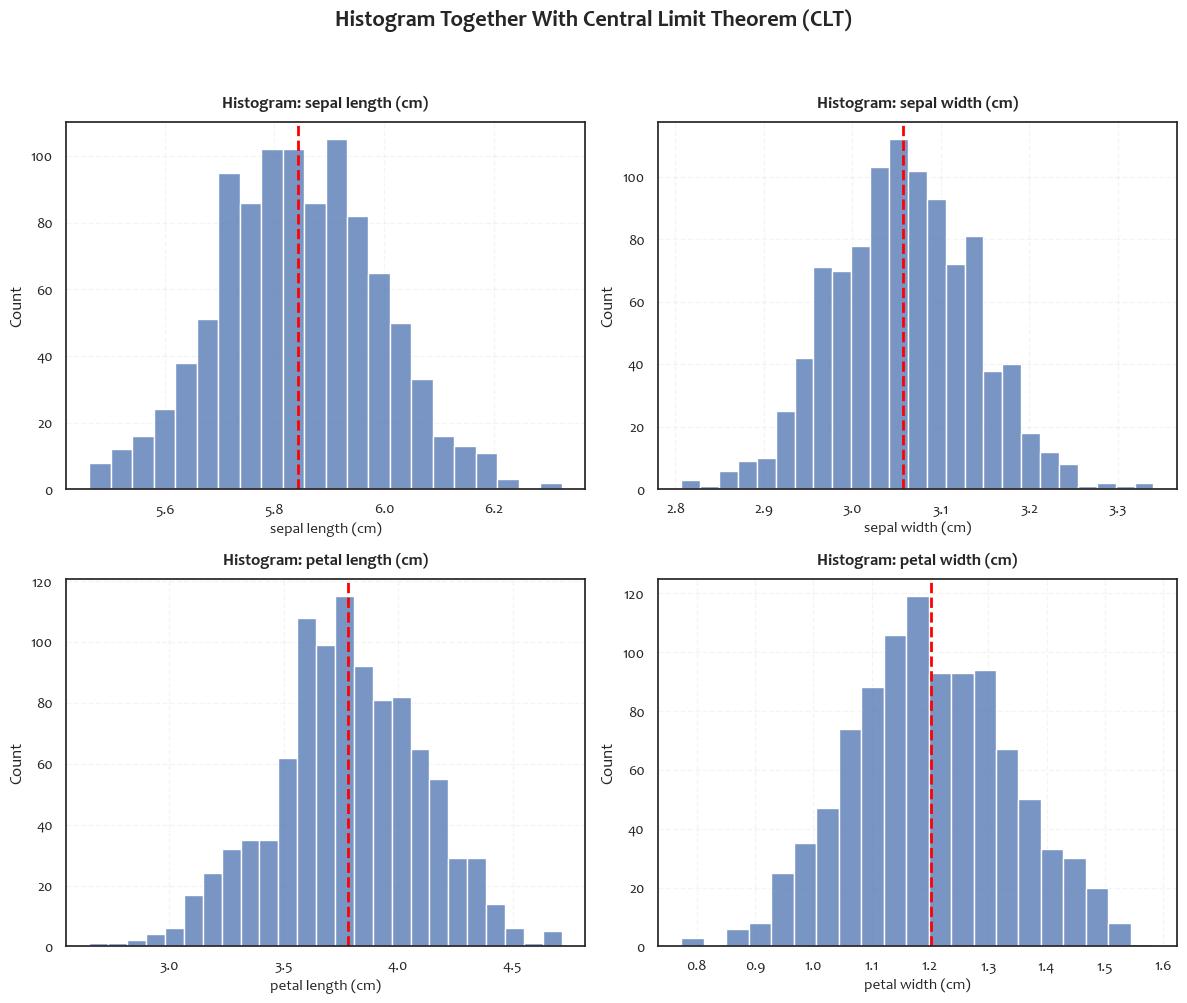

In [336]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)  # Number of rows in the grid
cols = min(num_variables, 2)  # Number of columns in the grid

plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
fig.suptitle('Histogram Together With Central Limit Theorem (CLT)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]
for idx, column in enumerate(Metrics):
    sample_means = [] 
    for _ in range(1000):
        sample = df[column].dropna().sample(n=30, replace=True)  # Ensure no NaN values
        sample_means.append(sample.mean())

    sample_means = np.array(sample_means).astype(float)  
    sns.histplot(sample_means, fill=True, ax=axes[idx])
    axes[idx].axvline(np.mean(sample_means), color='red', linestyle='dashed', linewidth=2)
    axes[idx].set_title(f"Histogram: {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.2)
    
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/ Central Limit Theorem (CLT) Histogram.png")
plt.show()

<h4 style='font-size: 20px; color: orange; font-family: Candara; font-weight: 600'>🔘 Q-Q Plot Together With Central Limit Theorem (CLT)</h4>

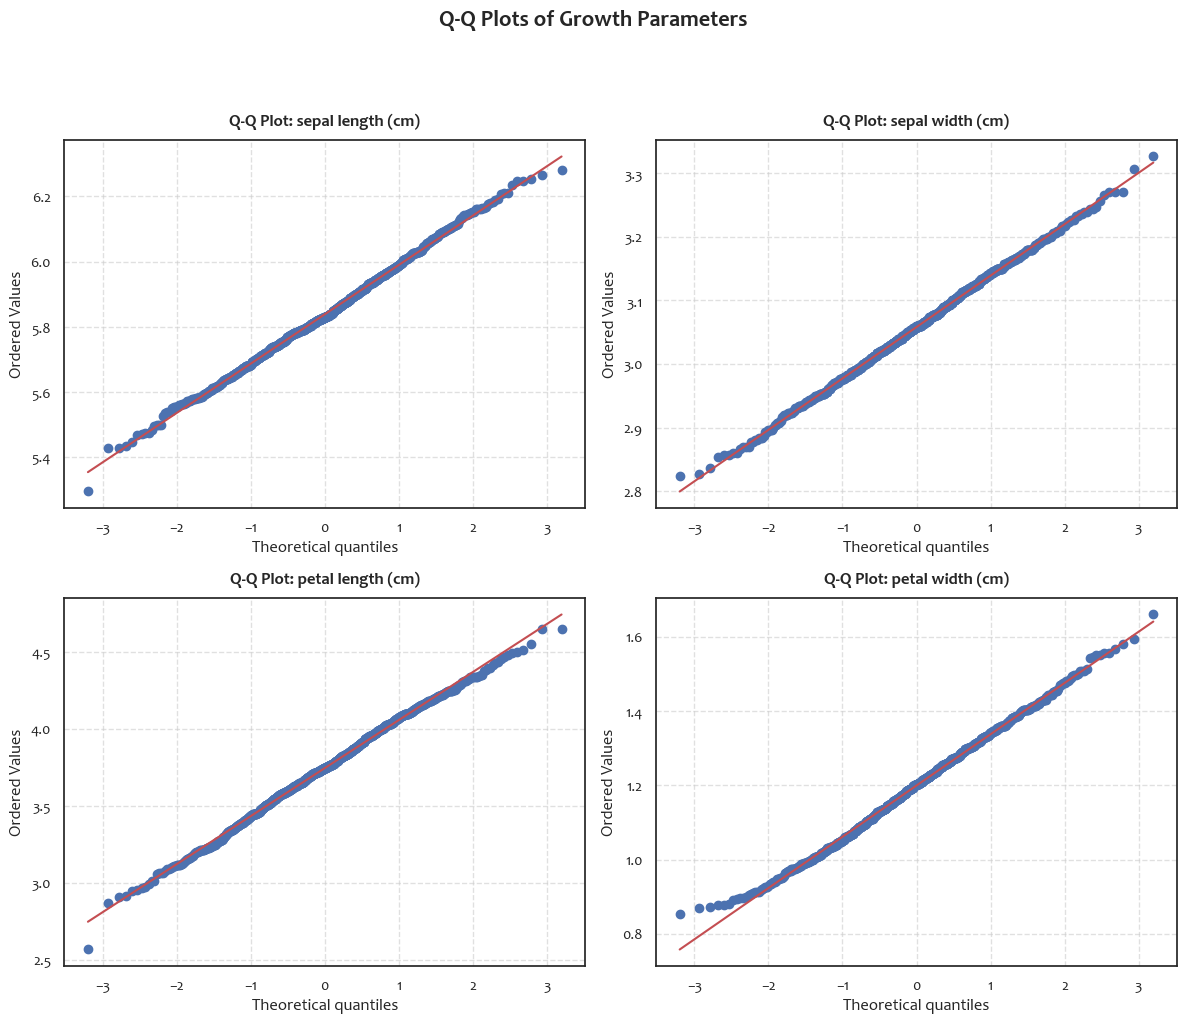

In [337]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)

fig, axes = plt.subplots(rows, 2, figsize=(12, 5 * rows))
fig.suptitle('Q-Q Plots of Growth Parameters', fontsize=16, fontweight='bold', y=1.02)
axes = axes.flatten() if num_variables > 1 else [axes]
for idx, column in enumerate(Metrics):
    sample_means = []
    for _ in range(1000):
        sample = df[column].dropna().sample(n=30, replace=True)  # Ensure no NaN values
        sample_means.append(sample.mean())
    sample_means = np.array(sample_means).astype(float)  
    stats.probplot(sample_means, dist="norm", plot=axes[idx])
    axes[idx].set_title(f"Q-Q Plot: {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].grid(linestyle='--', alpha=0.6)
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Q-Q Plot Together With Central Limit Theorem (CLT).png")
plt.show()

<h3 style='font-size: 25px; color: purple; font-family: Candara; font-weight: 600'>5.1.1.2: Homogeneity of Varience (Levanes Test)</h3>

The Levene's test is used to assess the homogeneity of variances across groups. Below is the Python code to perform Levene's test for all numerical variables in a DataFrame (df) and return the results in a formatted pandas DataFrame for easy comparison.

In [338]:
from scipy.stats import levene
def LevenesTest(df, Metrics, group_col):
    results = []
    for col in Metrics:
        grouped_data = [group[col].values for _, group in df.groupby(group_col)]
        stat, p_value = levene(*grouped_data)
        results.append({'Variable': col, 
                        'Statistic': stat, 
                        'P-Value': p_value, 
                        'Homogeneity': 'Homogeneous Varience' if p_value > 0.05 else 'Not Homogeneous Varience'})
        
    return pd.DataFrame(results)
    
levene_results = LevenesTest(df, Metrics, group_col='species')
levene_results = levene_results.style.format({'Statistic': '{:.2f}', 'P-Value': '{:.4f}'})
levene_results

,Variable,Statistic,P-Value,Homogeneity
0,sepal length (cm),6.35,0.0023,Not Homogeneous Varience
1,sepal width (cm),0.59,0.5555,Homogeneous Varience
2,petal length (cm),19.48,0.0000,Not Homogeneous Varience
3,petal width (cm),19.89,0.0000,Not Homogeneous Varience


<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>5.1.1.3: Analysis of Varience (One Way ANOVA)</h3>

**One-Way ANOVA** (Analysis of Variance) is a statistical test used to compare the means of three or more independent groups based on a single factor. It tests the null hypothesis that all group means are equal. If the p-value is less than the chosen significance level (usually 0.05), we reject the null hypothesis and conclude that there are significant differences among the group means. One-Way ANOVA is typically used when we have one categorical independent variable with multiple levels (groups) and one continuous dependent variable.

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>5.1.1.3: Analysis of Varience (One Way ANOVA)</h3>

In [339]:
def One_way_anova(data, numerical_columns, Factor, ):
    results = []
    for response_column in numerical_columns:
        safe_column_name = response_column.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
        data = data.rename(columns={response_column: safe_column_name})
        formula = f"{safe_column_name} ~ {Factor}"
        model = ols(formula, data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        
        for source, row in anova_table.iterrows():
            p_value = row["PR(>F)"]
            interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
            
            results.append({
                "Variable": response_column,
                "Source": source,
                "Sum Sq": row["sum_sq"],
                "df": row["df"],
                "F-Value": row["F"],
                "p-Value": p_value,
                "Interpretation": interpretation
            })
    
    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

Factor = "species"
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
Anova_results = One_way_anova(df, numerical_columns, Factor)
pd.set_option("display.float_format", "{:.4e}".format)  # Format p-value
Anova_results

,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,sepal length (cm),species,6.3212e+01,2.0000e+00,1.1926e+02,1.6697e-31,Significant difference
1,sepal length (cm),Residual,3.8956e+01,1.4700e+02,NaN,NaN,No significant difference
2,sepal width (cm),species,1.1345e+01,2.0000e+00,4.9160e+01,4.4920e-17,Significant difference
3,sepal width (cm),Residual,1.6962e+01,1.4700e+02,NaN,NaN,No significant difference
4,petal length (cm),species,4.3710e+02,2.0000e+00,1.1802e+03,2.8568e-91,Significant difference
5,petal length (cm),Residual,2.7223e+01,1.4700e+02,NaN,NaN,No significant difference
6,petal width (cm),species,8.0413e+01,2.0000e+00,9.6001e+02,4.1694e-85,Significant difference
7,petal width (cm),Residual,6.1566e+00,1.4700e+02,NaN,NaN,No significant difference


<h2 style='font-size: 30px; color: Tomato; font-family: Candara; font-weight: 600'>5.2: Non-Parametric Tests</h2>

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>5.2.1: Kruskal-Wallis test</h3>

The **Kruskal-Wallis Test** is a non-parametric alternative to One-Way ANOVA and is used when the assumptions of normality and homogeneity of variance are not met. It compares the medians of three or more independent groups and tests whether they come from the same distribution. Like ANOVA, the Kruskal-Wallis test assesses whether there are significant differences between the groups, but it does not assume a normal distribution, making it more robust in situations where data may not meet the assumptions of ANOVA. If the p-value is less than the significance threshold, it indicates that at least one of the groups is significantly different from the others.

In [157]:
from scipy.stats import kruskal
def Kruskal_Wallis_test(data, numerical_columns, factor):
    results = []
    
    for response_column in numerical_columns:
        groups = [data[response_column][data[factor] == group] for group in data[factor].unique()]
        stat, p_value = kruskal(*groups)
        interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
        results.append({
            "Variable": response_column,
            "Source of Variation": factor,
            "H-Statistic": stat,
            "p-Value": p_value,
            "Interpretation": interpretation
        })
    
    results_df = pd.DataFrame(results)
    return results_df


factor = "species"
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
kruskal_results_df = Kruskal_Wallis_test(df, numerical_columns, factor)
pd.set_option("display.float_format", "{:.4e}".format)
kruskal_results_df

,Variable,Source of Variation,H-Statistic,p-Value,Interpretation
0,sepal length (cm),species,9.6937e+01,8.9187e-22,Significant difference
1,sepal width (cm),species,6.3571e+01,1.5693e-14,Significant difference
2,petal length (cm),species,1.3041e+02,4.8040e-29,Significant difference
3,petal width (cm),species,1.3119e+02,3.2618e-29,Significant difference


<h1 style='font-size: 30px; color: Tomato; font-family: Candara; font-weight: 600'>📌 Tukey's Honest Significant Difference (THSD)</h1>

- To determine which specific group means are significantly different from each other

In [340]:
def Turkey_results(df, group=''):
    results_data = []
    for metric in Metrics:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Difference': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df
    
Turkeyresults = Turkey_results(df, group='species')
pd.set_option("display.float_format", "{:.3f}".format)
Turkeyresults

,Metric,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,sepal length (cm),setosa,versicolor,0.930,0.000,0.686,1.174,True
1,sepal length (cm),setosa,virginica,1.582,0.000,1.338,1.826,True
2,sepal length (cm),versicolor,virginica,0.652,0.000,0.408,0.896,True
3,sepal width (cm),setosa,versicolor,-0.658,0.000,-0.819,-0.497,True
4,sepal width (cm),setosa,virginica,-0.454,0.000,-0.615,-0.293,True
5,sepal width (cm),versicolor,virginica,0.204,0.009,0.043,0.365,True
6,petal length (cm),setosa,versicolor,2.798,0.000,2.594,3.002,True
7,petal length (cm),setosa,virginica,4.090,0.000,3.886,4.294,True
8,petal length (cm),versicolor,virginica,1.292,0.000,1.088,1.496,True
9,petal width (cm),setosa,versicolor,1.080,0.000,0.983,1.177,True


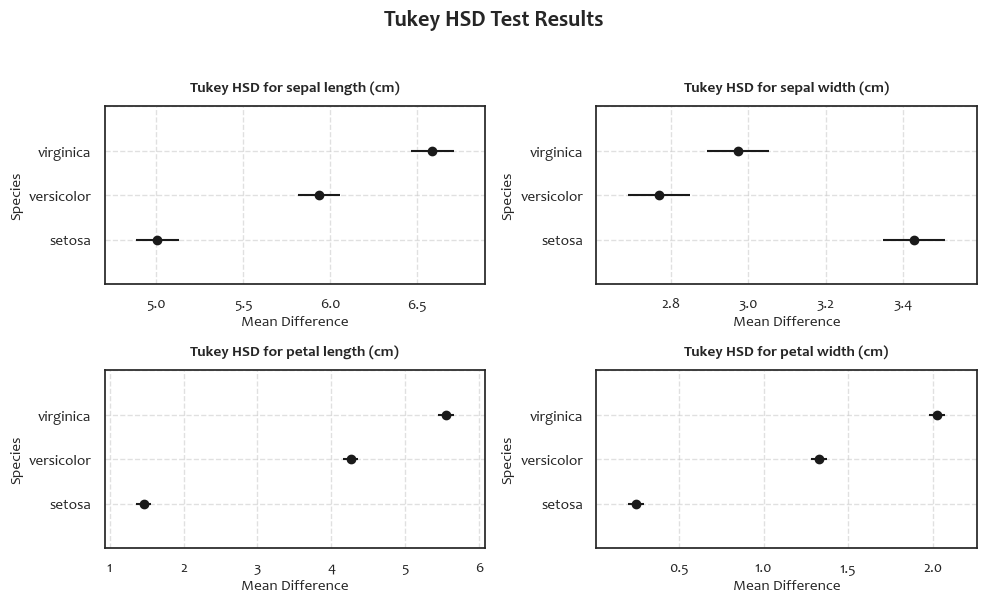

In [341]:
Metrics = df.select_dtypes(include=np.number).columns.tolist()


num_variables = len(Metrics)
rows = math.ceil(num_variables / 2)
cols = min(num_variables, 2)


fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11})
fig.suptitle("Tukey HSD Test Results", fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    # Perform Tukey HSD test
    tukey_result = pairwise_tukeyhsd(df[column], df['species'], alpha=0.05)
    
    # Plot Tukey HSD results
    tukey_result.plot_simultaneous(ax=axes[idx])  # Generates the Tukey HSD plot
    
    # Improve plot readability
    axes[idx].set_title(f"Tukey HSD for {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel("Mean Difference", fontsize=11)
    axes[idx].set_ylabel("Species", fontsize=11)
    axes[idx].grid(linestyle="--", alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("Visualizations/Tukey_HSD_Plot.png")
plt.show()


<h1 style='font-size: 35px; color: Green; font-family: Candara; font-weight: 600'>📌 Effect size calculation</h1>

 - Calculate the effect size  to quantify the magnitude of differences between the control and biopesticide-treated groups.  
 - Evaluate both statistical significance and practical significance to assess the real-world impact of each biopesticide.  

<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>7.1: Pearson’s (r)</h2>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [342]:
from scipy.stats import pearsonr
def compute_pearson_r(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])

            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

# Compute and return the Pearson's r results as a DataFrame
pearson_results_df = compute_pearson_r(df)
pearson_results_df

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.118,0.152,Negative,Weak
1,sepal length (cm),petal length (cm),0.872,0.000,Positive,Strong
2,sepal length (cm),petal width (cm),0.818,0.000,Positive,Strong
3,sepal width (cm),petal length (cm),-0.428,0.000,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.366,0.000,Negative,Moderate
5,petal length (cm),petal width (cm),0.963,0.000,Positive,Strong


<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>7.2: Partial Eta-squared (ηp²))</h2>

**Partial Eta-squared (ηp²)** is a measure of effect size that quantifies the proportion of the total variance in the dependent variable that is attributed to a particular independent variable (or factor), while controlling for the influence of other variables. This is useful in an analysis of variance (ANOVA) context, especially when multiple factors are involved.

In [343]:
def compute_partial_eta_squared(df, numerical_columns, Factors):
    results = []
    for column in numerical_columns:
        
        for factor in Factors:
            safe_column_name = column.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
            df = df.rename(columns={column: safe_column_name})
            formula = f'{safe_column_name} ~ C({factor})'
            model = ols(formula, data=df).fit()
            anova_results = anova_lm(model, typ=2)
            SS_factor = anova_results['sum_sq'][f'C({factor})']
            SS_error = anova_results['sum_sq']['Residual']
            partial_eta_squared = SS_factor / (SS_factor + SS_error)
            
            results.append({
                "Variables": column,
                "Factor": factor,
                "Partial Eta-squared (ηp²)": partial_eta_squared
            })
    

    eta_squared_df = pd.DataFrame(results)
    
    def interpret_eta_squared(eta_squared):
        if eta_squared >= 0.14: return "Large effect size (≥ 14%)"
        elif eta_squared >= 0.06: return "Medium effect size (6% - 14%)"
        else: return "Small effect size (< 6%)"
    eta_squared_df['Interpretation'] = eta_squared_df['Partial Eta-squared (ηp²)'].apply(interpret_eta_squared)
    return eta_squared_df


eta_squared_df = compute_partial_eta_squared(df, Metrics, Factors=['species'])
eta_squared_df

,Variables,Factor,Partial Eta-squared (ηp²),Interpretation
0,sepal length (cm),species,0.619,Large effect size (≥ 14%)
1,sepal width (cm),species,0.401,Large effect size (≥ 14%)
2,petal length (cm),species,0.941,Large effect size (≥ 14%)
3,petal width (cm),species,0.929,Large effect size (≥ 14%)


<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>7.3. Cohen's d</h2>

This is used to measure the difference between two group means in terms of standard deviations. It is often used in t-tests or comparing two independent samples. A small Cohen's d (around 0.2), medium (around 0.5), and large (around 0.8) indicate small, medium, and large effects, respectively.

In [344]:
def cohens_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    return (mean1 - mean2) / pooled_std

def interpret_cohens_d(d_value):
    if abs(d_value) < 0.2:
        interpretation = "Small effect size"
        explanation = "There is a small difference between the groups, and the effect is minimal."
    elif 0.2 <= abs(d_value) < 0.5:
        interpretation = "Medium effect size"
        explanation = "The difference between the groups is moderate, with noticeable effects."
    elif 0.5 <= abs(d_value) < 0.8:
        interpretation = "Large effect size"
        explanation = "There is a large difference between the groups, with a strong effect."
    else:
        interpretation = "Very large effect size"
        explanation = "The difference between the groups is very large, indicating a very strong effect."
    return interpretation, explanation


def calculate_effect_sizes(df, group_column, numerical_columns):
    effect_size_results = []
    for column in numerical_columns:
        group_values = df[group_column].unique()  # Get unique groups in the 'group_column'
        for i in range(len(group_values)):
            for j in range(i + 1, len(group_values)):  # Ensure each pair is unique
                group1 = df[df[group_column] == group_values[i]][column]
                group2 = df[df[group_column] == group_values[j]][column]
                
                # Calculate Cohen's d for this pair
                d_value = cohens_d(group1, group2)
                interpretation, explanation = interpret_cohens_d(d_value)
                
                # Store results in a list
                effect_size_results.append({
                    'Column': column,
                    'Pair': f'{group_values[i]} vs {group_values[j]}',
                    'Cohen\'s d': d_value,
                    'Interpretation': interpretation,
                    'Explanation': explanation
                })

    # Create a DataFrame from the results
    effect_size_df = pd.DataFrame(effect_size_results)
    return effect_size_df




numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
effect_sizes_df = calculate_effect_sizes(df, group_column="species", numerical_columns=numerical_columns)
pd.set_option('display.max_colwidth', 120) 
effect_sizes_df.head()

,Column,Pair,Cohen's d,Interpretation,Explanation
0,sepal length (cm),setosa vs versicolor,-2.104,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
1,sepal length (cm),setosa vs virginica,-3.077,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
2,sepal length (cm),versicolor vs virginica,-1.126,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
3,sepal width (cm),setosa vs versicolor,1.891,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
4,sepal width (cm),setosa vs virginica,1.290,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."


<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>7.4. Eta-squared (η²)</h2>

**Eta-squared (η²)** is a measure of effect size used in the context of **ANOVA** to quantify the proportion of the total variance in the dependent variable that is attributable to a specific independent variable (or factor). In other words, it tells you how much of the variance in the dependent variable can be explained by the independent variable or factor in the model. Its Often used in ANOVA, eta-squared measures the proportion of variance in the dependent variable that is explained by the independent variable(s). It is interpreted as the percentage of variability explained by the factors in the model, with values ranging from 0 to 1.

In [345]:

def eta_squared(aov_table):
    """Calculate eta-squared (η²) from the ANOVA table."""
    ss_between = aov_table["sum_sq"].iloc[0]  # Use .iloc[0] to avoid FutureWarning
    ss_total = aov_table["sum_sq"].sum()  # Total sum of squares
    return ss_between / ss_total

def perform_anova(df, dependent_var, independent_var):
    """Perform ANOVA and return results in a DataFrame."""
    model = ols(f'{dependent_var} ~ C({independent_var})', data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    
    eta_sq = eta_squared(aov_table)
    
    # Create a DataFrame including eta-squared (η²) as a new column
    aov_table["Eta-squared (η²)"] = np.nan
    aov_table.loc[f'C({independent_var})', "Eta-squared (η²)"] = eta_sq  # Assign only to between-group row
    
    return aov_table.reset_index().rename(columns={"index": "Source"})  # Reset index for cleaner output

# Example loop to process multiple metrics
Metrics = df.select_dtypes(include=np.number).columns.tolist()
results = []  # Store results for all metrics

for Metric in Metrics:
    safe_column_name = Metric.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
    data = df.rename(columns={Metric: safe_column_name})
      
    anova_df = perform_anova(data, safe_column_name, 'species')
    anova_df.insert(0, "Metric", Metric)  # Add Metric column for tracking
    
    results.append(anova_df)

# Combine all results into a single DataFrame
Eta_squared_df = pd.concat(results, ignore_index=True)
Eta_squared_df

,Metric,Source,sum_sq,df,F,PR(>F),Eta-squared (η²)
0,sepal length (cm),C(species),63.212,2.000,119.265,0.000,0.619
1,sepal length (cm),Residual,38.956,147.000,NaN,NaN,NaN
2,sepal width (cm),C(species),11.345,2.000,49.160,0.000,0.401
3,sepal width (cm),Residual,16.962,147.000,NaN,NaN,NaN
4,petal length (cm),C(species),437.103,2.000,1180.161,0.000,0.941
5,petal length (cm),Residual,27.223,147.000,NaN,NaN,NaN
6,petal width (cm),C(species),80.413,2.000,960.007,0.000,0.929
7,petal width (cm),Residual,6.157,147.000,NaN,NaN,NaN


<h1 style='font-size: 35px; color: crimson; font-family: Candara; font-weight: 600'>📌 Compact Letter Display (CLD)</h1>

In [346]:
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
        
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    def calculate_stats_for_column(col_name):
        # Perform OLS and ANOVA
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        
        # Extract p-value from ANOVA
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        
        # Perform Tukey's test
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        
        # Calculate statistics
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    
    # Process each numerical column
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    # Create the main results DataFrame
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    
    # Add p-values row
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    
    # Combine results with p-values
    final_results = pd.concat([results_df, p_value_df])
    
    return final_results

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>8.2: Compact Letter Display (CLD) Table</h3>

In [347]:
df.columns = df.columns.to_series().apply(rename)
cld = Compact_letters_display(df, Factor='species')
cld.columns = cld.columns.to_series().apply(rename_column_content)
cld

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.01 ± 0.05 c,3.43 ± 0.05 c,1.46 ± 0.02 c,0.25 ± 0.01 c
versicolor,5.94 ± 0.07 a,2.77 ± 0.04 a,4.26 ± 0.07 a,1.33 ± 0.03 a
virginica,6.59 ± 0.09 b,2.97 ± 0.05 b,5.55 ± 0.08 b,2.03 ± 0.04 b
p-value,0.0000***,0.0000***,0.0000***,0.0000***


<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>8.2: Compact Letter Display (CLD) Visualization</h3>

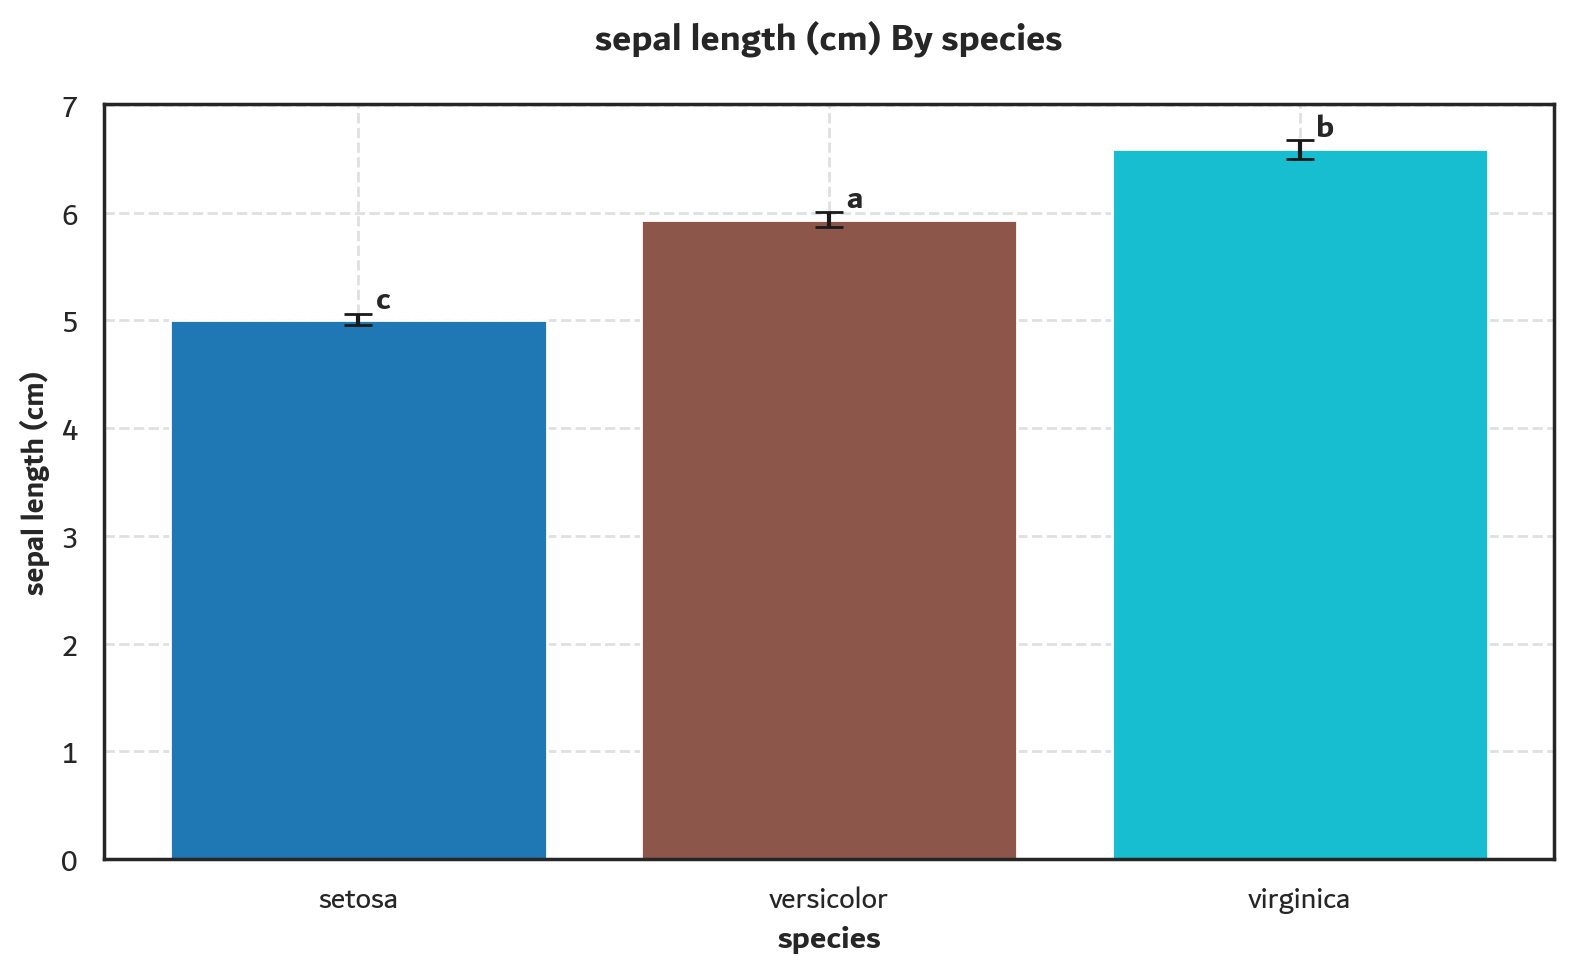

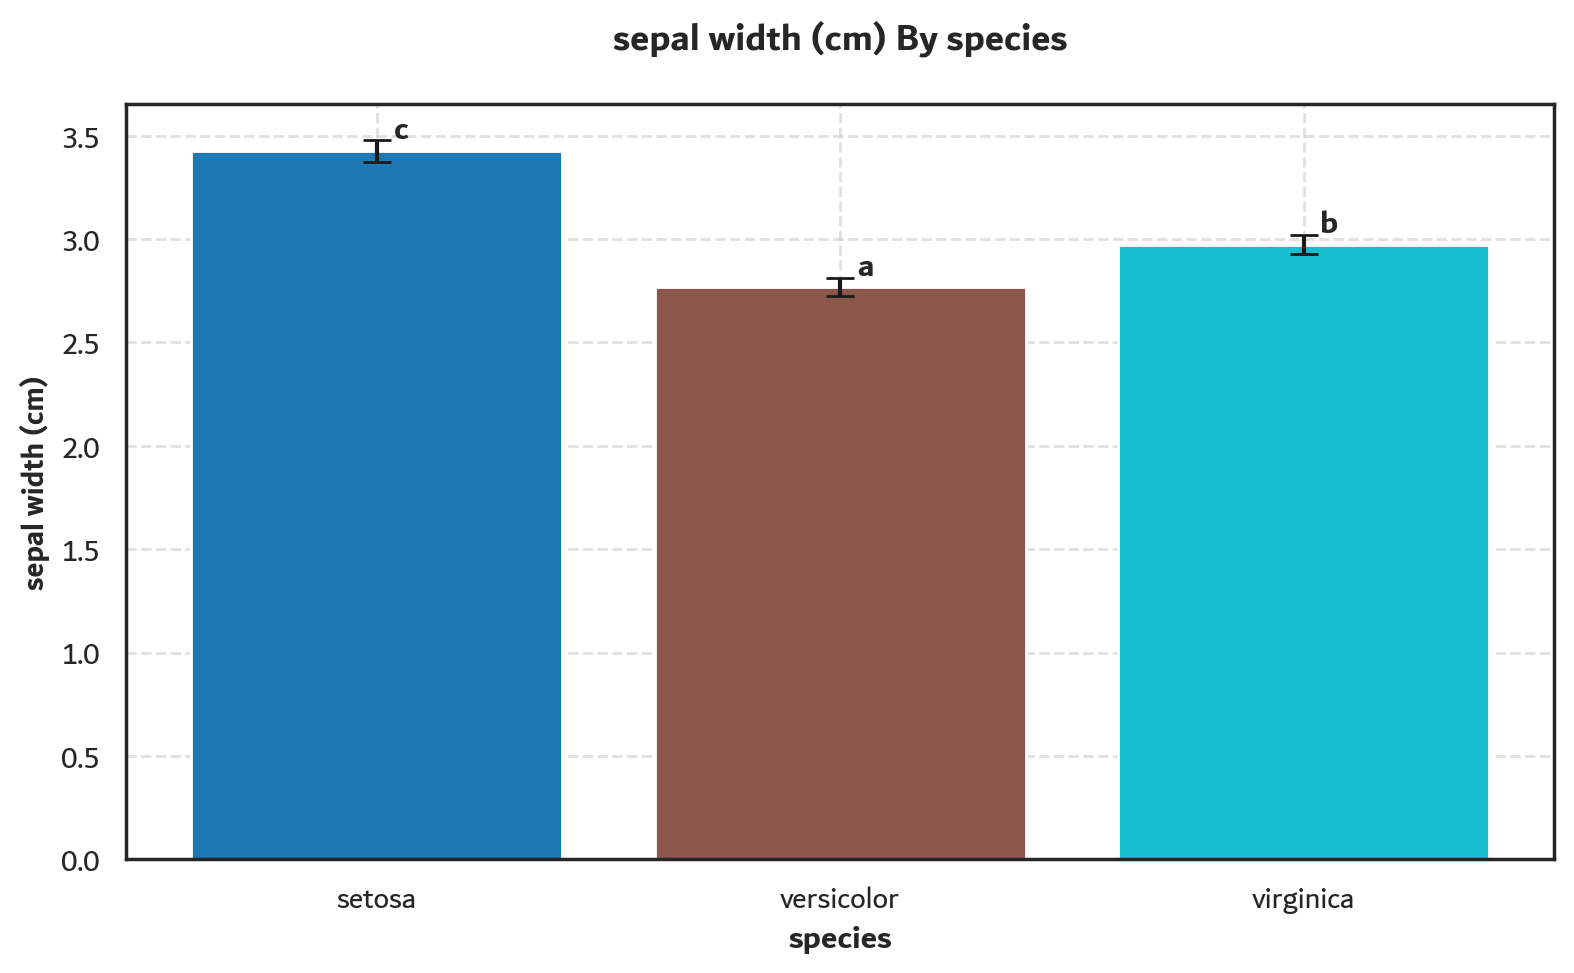

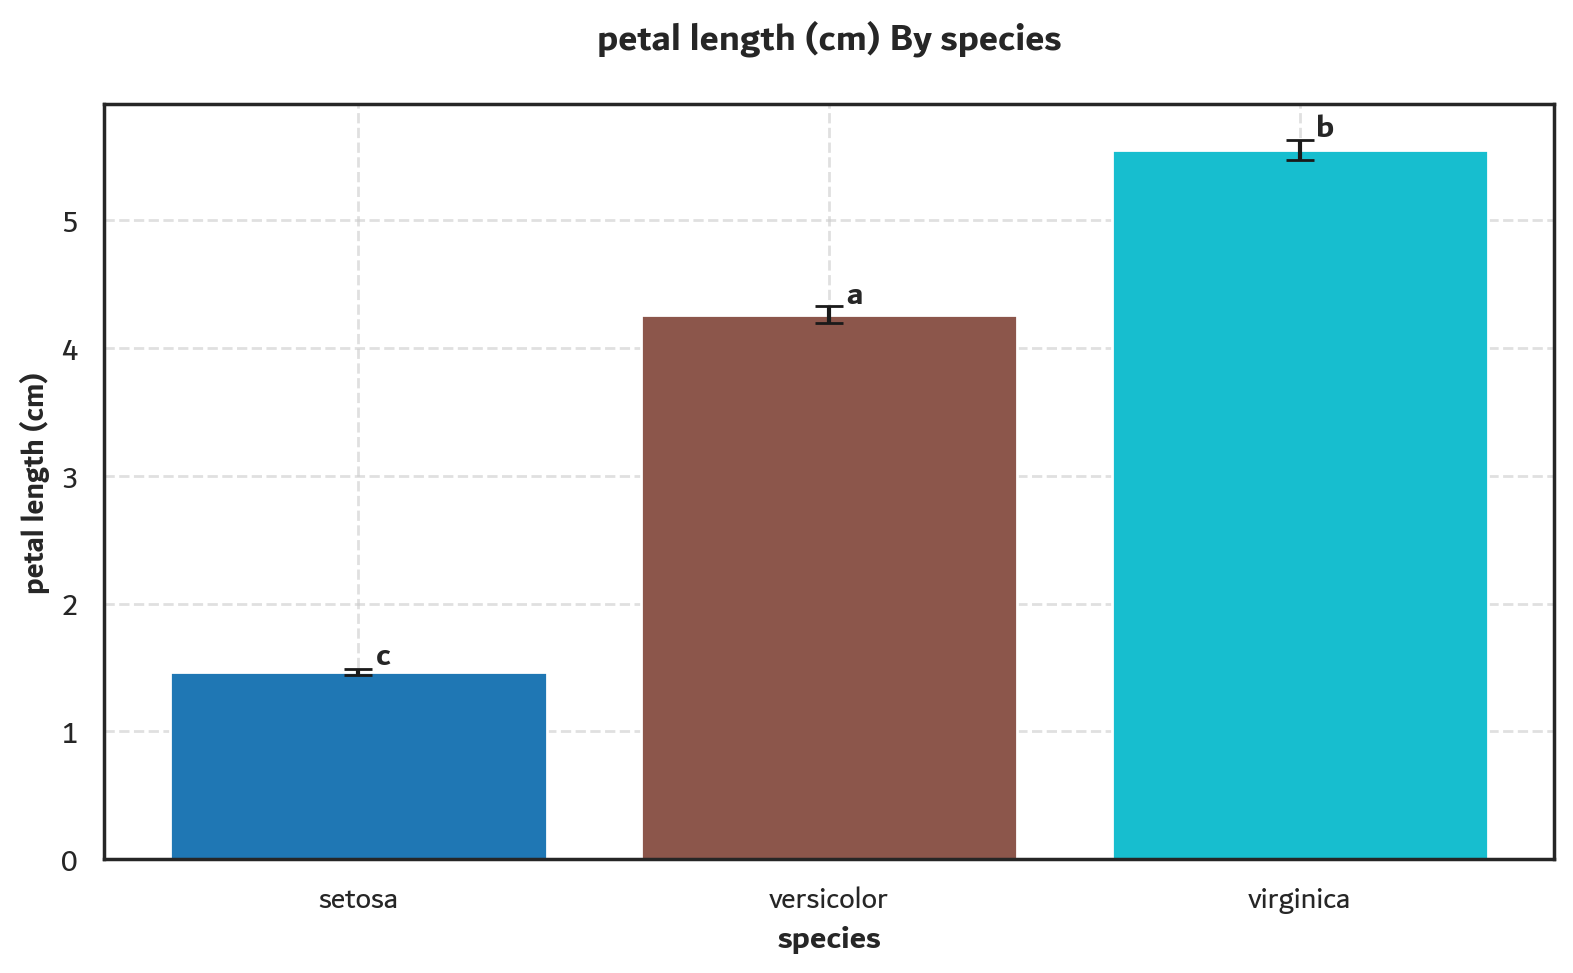

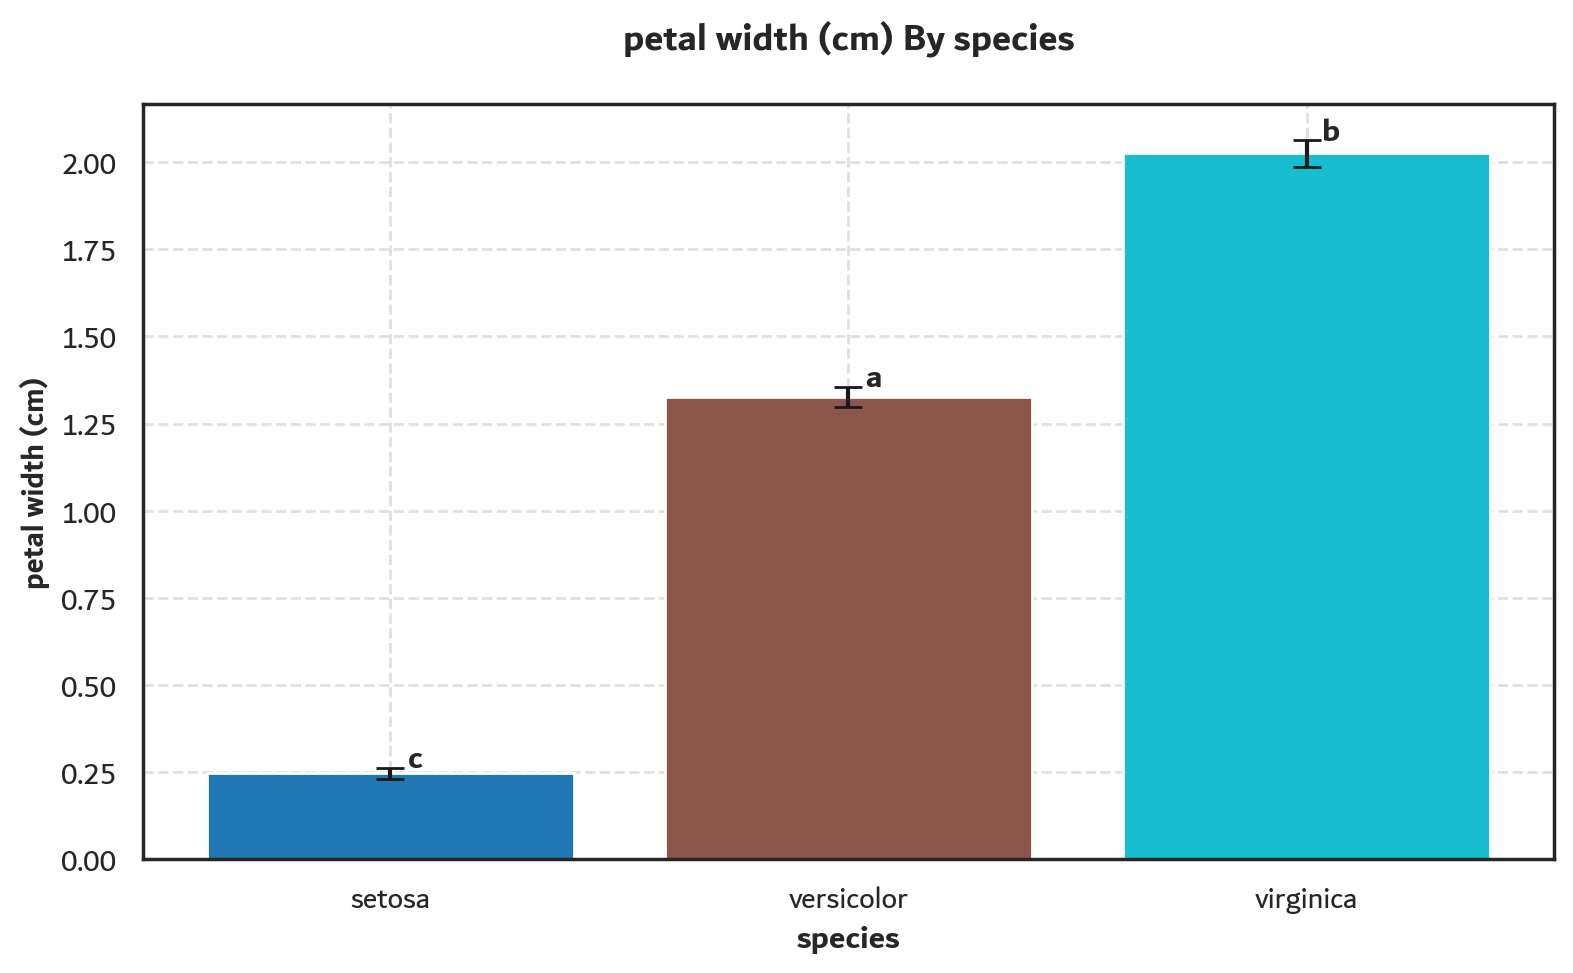

In [348]:
for col in Metrics:
    col = rename(ColumnName=col)
    Category = rename(ColumnName='species')
    df.columns = df.columns.to_series().apply(rename)
    
    Turkey= pairwise_tukeyhsd(df[col], groups= df[Category])
    Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
    group_labels = letters(Turkeyresults)
    
    Aggregate_df=df.groupby(Category)[col].agg(['mean', 'sem']).reset_index()
    
    plt.figure(figsize=(8, 5), dpi=200)
    error = np.full(len(Aggregate_df), Aggregate_df['sem'])
    custom_letters = group_labels
    
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    colors = plt.cm.tab10(np.linspace(0, 1, len(Aggregate_df)))
    bars = plt.bar(Aggregate_df[Category], Aggregate_df['mean'], yerr=error, color=colors, capsize=5)
    
    for bar, Produce in zip(bars, Aggregate_df[Category]):
        height = bar.get_height()
        offset = height * 0.01  # Adjust the multiplier for fine-tuning
        plt.annotate(custom_letters[Produce],
            xy=(bar.get_x() + bar.get_width() / 2, height + offset),
            xytext=(9, 0),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=12, fontweight='bold'
        )

    column_name = restore_name(col)
    category_name = restore_name(Category)
    plt.xticks(ticks=range(len(Aggregate_df[Category])),labels=Aggregate_df[Category], rotation=0, ha='center')
    plt.xlabel(category_name, fontsize=12, fontweight='bold',)
    plt.ylabel(column_name, fontsize=11, fontweight='bold',)
    
    plt.grid(linestyle='--', alpha=0.6)
    plt.title(f'{column_name} By {category_name}', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f"Visualizations/{column_name} Compact letter display.png")
    plt.show()

In [ ]:
num_variables = len(Metrics)
cols = min(num_variables, 2)  # 2 columns for better visualization
rows = math.ceil(num_variables / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle("Compact Letter Display of Different Metrics", fontsize=16, fontweight="bold")
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, col in enumerate(Metrics):
    col = rename(ColumnName=col)
    Category = rename(ColumnName="species")
    df.columns = df.columns.to_series().apply(rename)

    # Perform Tukey's HSD test
    Turkey = pairwise_tukeyhsd(df[col], groups=df[Category])
    Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
    group_labels = letters(Turkeyresults)

    # Aggregate mean and SEM
    Aggregate_df = df.groupby(Category)[col].agg(["mean", "sem"]).reset_index()

    # Assign the subplot to plot
    ax = axes[idx]

    # Plot bars
    error = np.full(len(Aggregate_df), Aggregate_df["sem"])
    colors = plt.cm.tab10(np.linspace(0, 1, len(Aggregate_df)))
    bars = ax.bar(Aggregate_df[Category], Aggregate_df["mean"], yerr=error, color=colors, capsize=5)

    # Add compact letter annotations
    for bar, Produce in zip(bars, Aggregate_df[Category]):
        height = bar.get_height()
        offset = height * 0.02  # Dynamic adjustment
        ax.annotate(group_labels[Produce],
                    xy=(bar.get_x() + bar.get_width() / 2, height + offset),
                    xytext=(9, 0),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=12, fontweight="bold")

    # Restore original column and category names
    column_name = restore_name(col)
    category_name = restore_name(Category)
    
    # Customize the subplot
    ax.set_xticks(range(len(Aggregate_df[Category])))
    ax.set_xticklabels(Aggregate_df[Category], rotation=0, ha="center")
    ax.set_xlabel(category_name, fontsize=12, fontweight="bold")
    ax.set_ylabel(column_name, fontsize=11, fontweight="bold")
    ax.set_title(f"{column_name.title()} By {category_name.title()}", fontsize=14, fontweight="bold")
    ax.grid(linestyle="--", alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Compact Letter Display of Different Metrics.png")
plt.show()

---
This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via email at **[Jabulente@hotmail.com](Jabulente@hotmail.com)**

----

<h5 style='font-size: 65px; color: crimson; font-family: Amh5erzand; font-weight: 600; text-align: center'>THE END</h5>